In [1]:
## Data Analysis Phase
## MAin aim is to understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [119]:
#Reading Dictionary dataset
dict_data = pd.read_excel('Data+Dictionary-+Telecom+Churn+Case+Study.xlsx')
dict_data

Acronyms                                           Descriptions
0   MOBILE_NUMBER                              Customer phone number
1       CIRCLE_ID  Telecom circle area to which the customer belo...
2             LOC           Local calls - within same telecom circle
3             STD             STD calls - outside the calling circle
4              IC                                     Incoming calls
5              OG                                     Outgoing calls
6             T2T  Operator T to T, i.e. within same operator (mo...
7         T2M                    Operator T to other operator mobile
8         T2O                Operator T to other operator fixed line
9         T2F                         Operator T to fixed lines of T
10        T2C                     Operator T to it’s own call center
11       ARPU                               Average revenue per user
12        MOU                         Minutes of usage - voice calls
13        AON      Age on network - number of days the customer i...
14       ONNET     All kind of calls within the same operator net...
15     OFFNET       All kind of calls outside the operator T network
16           ROAM  Indicates that customer is in roaming zone dur...
17         SPL                                         Special calls
18        ISD                                              ISD calls
19       RECH                                               Recharge
20        NUM                                                 Number
21        AMT                               Amount in local currency
22        MAX                                                Maximum
23       DATA                                        Mobile internet
24         3G                                             3G network
25         AV                                                Average
26        VOL                   Mobile internet usage volume (in MB)
27         2G                                             2G network
28        PCK                 Prepaid service schemes called - PACKS
29      NIGHT         Scheme to use during specific night hours only
30    MONTHLY      Service schemes with validity equivalent to a ...
31      SACHET     Service schemes with validity smaller than a m...
32        *.6                              KPI for the month of June
33        *.7                              KPI for the month of July
34        *.8                            KPI for the month of August
35        *.9                         KPI for the month of September
36        FB_USER  Service scheme to avail services of Facebook a...
37        VBC      Volume based cost - when no specific scheme is...

In [2]:
#Reading dataset
dataset = pd.read_csv('telecom_churn_data.csv')
dataset.head(5)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [121]:
## print shape of dataset with rows and columns
print(dataset.shape)


(99999, 226)


In [122]:
# Data information
dataset.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [123]:
# look at data statistics
dataset.describe(include='all')

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count    9.999900e+04    99999.0         98981.0         98981.0   
unique            NaN        NaN             NaN             NaN   
top               NaN        NaN             NaN             NaN   
freq              NaN        NaN             NaN             NaN   
mean     7.001207e+09      109.0             0.0             0.0   
std      6.956694e+05        0.0             0.0             0.0   
min      7.000000e+09      109.0             0.0             0.0   
25%      7.000606e+09      109.0             0.0             0.0   
50%      7.001205e+09      109.0             0.0             0.0   
75%      7.001812e+09      109.0             0.0             0.0   
max      7.002411e+09      109.0             0.0             0.0   

        loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
count          98981.0                99999                99398   
unique             NaN                    1                    1   
top                NaN            6/30/2014            7/31/2014   
freq               NaN                99999                99398   
mean               0.0                  NaN                  NaN   
std                0.0                  NaN                  NaN   
min                0.0                  NaN                  NaN   
25%                0.0                  NaN                  NaN   
50%                0.0                  NaN                  NaN   
75%                0.0                  NaN                  NaN   
max                0.0                  NaN                  NaN   

       last_date_of_month_8 last_date_of_month_9        arpu_6        arpu_7  \
count                 98899                98340  99999.000000  99999.000000   
unique                    1                    1           NaN           NaN   
top               8/31/2014            9/30/2014           NaN           NaN   
freq                  98899                98340           NaN           NaN   
mean                    NaN                  NaN    282.987358    278.536648   
std                     NaN                  NaN    328.439770    338.156291   
min                     NaN                  NaN  -2258.709000  -2014.045000   
25%                     NaN                  NaN     93.411500     86.980500   
50%                     NaN                  NaN    197.704000    191.640000   
75%                     NaN                  NaN    371.060000    365.344500   
max                     NaN                  NaN  27731.088000  35145.834000   

              arpu_8        arpu_9   onnet_mou_6   onnet_mou_7   onnet_mou_8  \
count   99999.000000  99999.000000  96062.000000  96140.000000  94621.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      279.154731    261.645069    132.395875    133.670805    133.018098   
std       344.474791    341.998630    297.207406    308.794148    308.951589   
min      -945.808000  -1899.505000      0.000000      0.000000      0.000000   
25%        84.126000     62.685000      7.380000      6.660000      6.460000   
50%       192.080000    176.849000     34.310000     32.330000     32.360000   
75%       369.370500    353.466500    118.740000    115.595000    115.860000   
max     33543.624000  38805.617000   7376.710000   8157.780000  10752.560000   

         onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
count   92254.000000  96062.000000  96140.000000  94621.000000  92254.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      130.302327    197.935577    197.045133    

##### In Data Analysis We will Analyze To Find out the below stuff
   1. Missing Values
   2. All The Numerical Variables
   3. Distribution of the Numerical Variables
   4. Categorical Variables
   


In [124]:
# Step 1 : Missing values

In [3]:
# Return Feature name and percentage of null value . Descending order 
def feature_with_na_values(dataset,percentage):
    feature_name_per = {}
    feature_column = []
    ## 1 -step make the list of features which has missing values
    features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
    ## 2- step print the feature name and the percentage of missing values
    for feature in features_with_na:
        if percentage < (dataset[feature].isnull().mean())*100 :
            feature_column.append(feature)
            feature_name_per[feature] = np.round((dataset[feature].isnull().mean())*100, 4)
    
    feature_name_per = sorted(feature_name_per.items(), key=lambda x: x[1], reverse=True)
    return feature_name_per,feature_column

In [5]:
## Here we will check the percentage of nan values present in each feature
feature_name_per,feature_column_70 = feature_with_na_values(dataset,70)
print(feature_column_70)
print(len(feature_column_70))

['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']
40


In [6]:
#Feature haveing less than 70% null values
# Excluding Modile Number and circle Id
feature_column_10 = [ col_name for col_name in dataset if col_name not in feature_column_70 
                     and col_name not in  ['mobile_number', 'circle_id']]
print(feature_column_10)
print(len(feature_column_10))
print(len(feature_column_10)+len(feature_column_70)+2 == dataset.shape[1])
print(dataset.shape[1])

['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_

In [7]:
# Get Numerical column name from dataset
# To get numerical column name , getType = 'num' ==> numerical_categrical_columns(dataset,'num')
# To get categrical column name , getType is optional ==> numerical_categrical_columns(dataset)

def numerical_categrical_columns(data,getType='categ'):
    list_column_name = []
    if(getType == 'categ'):
        list_column_name = [feature for feature in data.columns if dataset[feature].dtypes == 'O']
    else:
        list_column_name = [feature for feature in data.columns if dataset[feature].dtypes != 'O']
    return data[list_column_name],list_column_name

In [8]:
# list of numerical variables
numerical_features,num_column_name = numerical_categrical_columns(dataset,'num')
#numerical_features.head(5)
print('Number of columns ',len(num_column_name))
print(num_column_name)

Number of columns  214
['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_

#### Divide data 
   

In [9]:
# Getting Date columns
def date_columns(column_name):
    date_column = [col  for col in column_name if 'date' in col] 
    return date_column

In [10]:
dataset_date_column = date_columns(dataset.columns)
#dataset_date_column = dataset[dataset_date_column]
#dataset_date_column.head()
dataset_date_column

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

In [11]:
# Getting Id columns
id_cols = ['mobile_number', 'circle_id']

In [12]:
# Get all categrical feature from individual
def get_value_count(column_name):
    numerical_feature_10 = []
    for feature in column_name:
    # print('{} ----> categries are {}'.format(feature,dataset[feature].unique()))
    #
        if len(dataset[feature].unique())<10 and feature not in id_cols + dataset_date_column + feature_column_70:
        #print('{} ----> categries are {}'.format(feature,len(dataset[feature].unique())))
            print('#####################')
            print('Featur Name ',feature,'\n',dataset[feature].value_counts())
            numerical_feature_10.append(feature)
            print('#####################')
            
    return numerical_feature_10  
    

In [14]:
numerical_feature_10 = get_value_count(feature_column_10)

#####################
Featur Name  loc_og_t2o_mou 
 0.0    98981
Name: loc_og_t2o_mou, dtype: int64
#####################
#####################
Featur Name  std_og_t2o_mou 
 0.0    98981
Name: std_og_t2o_mou, dtype: int64
#####################
#####################
Featur Name  loc_ic_t2o_mou 
 0.0    98981
Name: loc_ic_t2o_mou, dtype: int64
#####################
#####################
Featur Name  std_og_t2c_mou_6 
 0.0    96062
Name: std_og_t2c_mou_6, dtype: int64
#####################
#####################
Featur Name  std_og_t2c_mou_7 
 0.0    96140
Name: std_og_t2c_mou_7, dtype: int64
#####################
#####################
Featur Name  std_og_t2c_mou_8 
 0.0    94621
Name: std_og_t2c_mou_8, dtype: int64
#####################
#####################
Featur Name  std_og_t2c_mou_9 
 0.0    92254
Name: std_og_t2c_mou_9, dtype: int64
#####################
#####################
Featur Name  std_ic_t2o_mou_6 
 0.0    96062
Name: std_ic_t2o_mou_6, dtype: int64
#####################
####

In [15]:
#dataset[numerical_feature_10].head(dataset.shape[0])
dataset[numerical_feature_10].head(20)

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  std_og_t2c_mou_6  \
0              0.0             0.0             0.0               NaN   
1              0.0             0.0             0.0               0.0   
2              0.0             0.0             0.0               0.0   
3              0.0             0.0             0.0               0.0   
4              0.0             0.0             0.0               0.0   
5              0.0             0.0             0.0               0.0   
6              0.0             0.0             0.0               0.0   
7              0.0             0.0             0.0               0.0   
8              0.0             0.0             0.0               0.0   
9              0.0             0.0             0.0               0.0   
10             0.0             0.0             0.0               0.0   
11             0.0             0.0             0.0               0.0   
12             0.0             0.0             0.0               0.0   
13             0.0             0.0             0.0               0.0   
14             0.0             0.0             0.0               0.0   
15             0.0             0.0             0.0               NaN   
16             0.0             0.0             0.0               0.0   
17             0.0             0.0             0.0               0.0   
18             0.0             0.0             0.0               0.0   
19             0.0             0.0             0.0               0.0   

    std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_t2c_mou_9  std_ic_t2o_mou_6  \
0                NaN               0.0               NaN               NaN   
1                0.0               0.0               0.0               0.0   
2                0.0               0.0               0.0               0.0   
3                0.0               0.0               0.0               0.0   
4                0.0               0.0               0.0               0.0   
5                0.0               0.0               0.0               0.0   
6                0.0               0.0               0.0               0.0   
7                0.0               0.0               NaN               0.0   
8                0.0               0.0               0.0               0.0   
9                0.0               0.0               0.0               0.0   
10               NaN               0.0               0.0               0.0   
11               0.0               0.0               0.0               0.0   
12               0.0               0.0               0.0               0.0   
13               0.0               0.0               0.0               0.0   
14               0.0               0.0               0.0               0.0   
15               0.0               0.0               0.0               NaN   
16               0.0               0.0               0.0               0.0   
17               0.0               0.0               0.0               0.0   
18               0.0               0.0               0.0               0.0   
19               0.0               0.0               0.0               0.0   

    std_ic_t2o_mou_7  std_ic_t2o_mou_8  std_ic_t2o_mou_9  monthly_2g_6  \
0                NaN               0.0               NaN             0   
1                0.0               0.0               0.0             0   
2                0.0               0.0               0.0             0   
3                0.0               0.0               0.0             0   
4                0.0               0.0               0.0             0   
5                0.0               0.0               0.0             0   
6                0.0               0.0               0.0             0   
7                0.0               0.0               NaN             0   
8                0.0               0.0               0.0             0   
9                0.0               0.0               0.0             0   
10               NaN               0.0

In [16]:
# look at missing value ratio in each column 
# Before applying Nan --> 0
dataset[numerical_feature_10].isnull().sum()*100/dataset[numerical_feature_10].shape[0]

loc_og_t2o_mou      1.018010
std_og_t2o_mou      1.018010
loc_ic_t2o_mou      1.018010
std_og_t2c_mou_6    3.937039
std_og_t2c_mou_7    3.859039
std_og_t2c_mou_8    5.378054
std_og_t2c_mou_9    7.745077
std_ic_t2o_mou_6    3.937039
std_ic_t2o_mou_7    3.859039
std_ic_t2o_mou_8    5.378054
std_ic_t2o_mou_9    7.745077
monthly_2g_6        0.000000
monthly_2g_7        0.000000
monthly_2g_8        0.000000
monthly_2g_9        0.000000
dtype: float64

In [17]:
dataset[numerical_feature_10].describe()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  std_og_t2c_mou_6  \
count         98981.0         98981.0         98981.0           96062.0   
mean              0.0             0.0             0.0               0.0   
std               0.0             0.0             0.0               0.0   
min               0.0             0.0             0.0               0.0   
25%               0.0             0.0             0.0               0.0   
50%               0.0             0.0             0.0               0.0   
75%               0.0             0.0             0.0               0.0   
max               0.0             0.0             0.0               0.0   

       std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_t2c_mou_9  std_ic_t2o_mou_6  \
count           96140.0           94621.0           92254.0           96062.0   
mean                0.0               0.0               0.0               0.0   
std                 0.0               0.0               0.0               0.0   
min                 0.0               0.0               0.0               0.0   
25%                 0.0               0.0               0.0               0.0   
50%                 0.0               0.0               0.0               0.0   
75%                 0.0               0.0               0.0               0.0   
max                 0.0               0.0               0.0               0.0   

       std_ic_t2o_mou_7  std_ic_t2o_mou_8  std_ic_t2o_mou_9  monthly_2g_6  \
count           96140.0           94621.0           92254.0  99999.000000   
mean                0.0               0.0               0.0      0.079641   
std                 0.0               0.0               0.0      0.295058   
min                 0.0               0.0               0.0      0.000000   
25%                 0.0               0.0               0.0      0.000000   
50%                 0.0               0.0               0.0      0.000000   
75%                 0.0               0.0               0.0      0.000000   
max                 0.0               0.0               0.0      4.000000   

       monthly_2g_7  monthly_2g_8  monthly_2g_9  
count  99999.000000  99999.000000  99999.000000  
mean       0.083221      0.081001      0.068781  
std        0.304395      0.299568      0.278120  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000  
75%        0.000000      0.000000      0.000000  
max        5.000000      5.000000      4.000000

In [18]:
# impute missing values with 0
dataset[numerical_feature_10] = dataset[numerical_feature_10].apply(lambda x: x.fillna(0))

In [19]:
# After applying Nan --> 0
dataset[numerical_feature_10].isnull().sum()*100/dataset[numerical_feature_10].shape[0]

loc_og_t2o_mou      0.0
std_og_t2o_mou      0.0
loc_ic_t2o_mou      0.0
std_og_t2c_mou_6    0.0
std_og_t2c_mou_7    0.0
std_og_t2c_mou_8    0.0
std_og_t2c_mou_9    0.0
std_ic_t2o_mou_6    0.0
std_ic_t2o_mou_7    0.0
std_ic_t2o_mou_8    0.0
std_ic_t2o_mou_9    0.0
monthly_2g_6        0.0
monthly_2g_7        0.0
monthly_2g_8        0.0
monthly_2g_9        0.0
dtype: float64

In [20]:
# Get all categrical feature from individual

def get_value_count(column_name):
    numerical_feature_70 = []
    for feature in column_name:
    # print('{} ----> categries are {}'.format(feature,dataset[feature].unique()))
    #
        if len(dataset[feature].unique())<10 and feature not in id_cols + dataset_date_column + numerical_feature_10:
        #print('{} ----> categries are {}'.format(feature,len(dataset[feature].unique())))
            print('#####################')
            print('Featur Name ',feature,'\n',dataset[feature].value_counts())
            numerical_feature_70.append(feature)
            print('#####################')
            
    return numerical_feature_70

In [22]:
numerical_feature_70 = get_value_count(feature_column_70)
numerical_feature_70

#####################
Featur Name  night_pck_user_6 
 0.0    24522
1.0      631
Name: night_pck_user_6, dtype: int64
#####################
#####################
Featur Name  night_pck_user_7 
 0.0    24982
1.0      589
Name: night_pck_user_7, dtype: int64
#####################
#####################
Featur Name  night_pck_user_8 
 0.0    25790
1.0      549
Name: night_pck_user_8, dtype: int64
#####################
#####################
Featur Name  night_pck_user_9 
 0.0    25508
1.0      414
Name: night_pck_user_9, dtype: int64
#####################
#####################
Featur Name  fb_user_6 
 1.0    23000
0.0     2153
Name: fb_user_6, dtype: int64
#####################
#####################
Featur Name  fb_user_7 
 1.0    23238
0.0     2333
Name: fb_user_7, dtype: int64
#####################
#####################
Featur Name  fb_user_8 
 1.0    23463
0.0     2876
Name: fb_user_8, dtype: int64
#####################
#####################
Featur Name  fb_user_9 
 1.0    22318
0.0     3

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [23]:
dataset[numerical_feature_70].head(20)

night_pck_user_6  night_pck_user_7  night_pck_user_8  night_pck_user_9  \
0                0.0               0.0               0.0               NaN   
1                NaN               0.0               0.0               NaN   
2                NaN               NaN               NaN               0.0   
3                NaN               NaN               NaN               NaN   
4                0.0               NaN               NaN               NaN   
5                NaN               NaN               NaN               NaN   
6                NaN               NaN               NaN               NaN   
7                NaN               NaN               NaN               NaN   
8                NaN               0.0               0.0               NaN   
9                NaN               0.0               NaN               NaN   
10               NaN               NaN               0.0               0.0   
11               NaN               NaN               0.0               NaN   
12               NaN               NaN               NaN               NaN   
13               NaN               NaN               0.0               NaN   
14               NaN               NaN               NaN               NaN   
15               NaN               NaN               NaN               NaN   
16               NaN               NaN               NaN               NaN   
17               NaN               NaN               NaN               NaN   
18               NaN               NaN               NaN               NaN   
19               0.0               0.0               0.0               NaN   

    fb_user_6  fb_user_7  fb_user_8  fb_user_9  
0         1.0        1.0        1.0        NaN  
1         NaN        1.0        1.0        NaN  
2         NaN        NaN        NaN        1.0  
3         NaN        NaN        NaN        NaN  
4         0.0        NaN        NaN        NaN  
5         NaN        NaN        NaN        NaN  
6         NaN        NaN        NaN        NaN  
7         NaN        NaN        NaN        NaN  
8         NaN        1.0        1.0        NaN  
9         NaN        1.0        NaN        NaN  
10        NaN        NaN        1.0        1.0  
11        NaN        NaN        1.0        NaN  
12        NaN        NaN        NaN        NaN  
13        NaN        NaN        1.0        NaN  
14        NaN        NaN        NaN        NaN  
15        NaN        NaN        NaN        NaN  
16        NaN        NaN        NaN        NaN  
17        NaN        NaN        NaN        NaN  
18        NaN        NaN        NaN        NaN  
19        1.0        1.0        1.0        NaN

In [24]:
# look at missing value ratio in each column 
# Before applying Nan --> 0
dataset[numerical_feature_70].isnull().sum()*100/dataset[numerical_feature_70].shape[0]

night_pck_user_6    74.846748
night_pck_user_7    74.428744
night_pck_user_8    73.660737
night_pck_user_9    74.077741
fb_user_6           74.846748
fb_user_7           74.428744
fb_user_8           73.660737
fb_user_9           74.077741
dtype: float64

In [25]:
# impute missing values with -1
dataset[numerical_feature_70] = dataset[numerical_feature_70].apply(lambda x: x.fillna(-1))

In [26]:
# After applying Nan --> 0
dataset[numerical_feature_70].isnull().sum()*100/dataset[numerical_feature_70].shape[0]

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64

In [27]:
## Here we will check the percentage of nan values present in each feature
feature_name_per,feature_column_70 = feature_with_na_values(dataset,70)
print(feature_column_70)
print(len(feature_column_70))

['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9']
32


In [28]:
#Exclusing Date columns from feature_column_70
feature_column_70_ex_date = [col_name for col_name in feature_column_70 if col_name not in dataset_date_column]
feature_column_70_ex_date

['total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9']

In [29]:
# Describe dataset[feature_column_70_ex_date]
dataset[feature_column_70_ex_date].describe()

total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       25153.000000       25571.000000       26339.000000   
mean            2.463802           2.666419           2.651999   
std             2.789128           3.031593           3.074987   
min             1.000000           1.000000           1.000000   
25%             1.000000           1.000000           1.000000   
50%             1.000000           1.000000           1.000000   
75%             3.000000           3.000000           3.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
count       25922.000000     25153.000000     25571.000000     26339.000000   
mean            2.441170       126.393392       126.729459       125.717301   
std             2.516339       108.477235       109.765267       109.437851   
min             1.000000         1.000000         1.000000         1.000000   
25%             1.000000        25.000000        25.000000        25.000000   
50%             2.000000       145.000000       145.000000       145.000000   
75%             3.000000       177.000000       177.000000       179.000000   
max            84.000000      1555.000000      1555.000000      1555.000000   

       max_rech_data_9  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  \
count      25922.00000     25153.000000     25571.000000     26339.000000   
mean         124.94144         1.864668         2.044699         2.016288   
std          111.36376         2.570254         2.768332         2.720132   
min            1.00000         0.000000         0.000000         0.000000   
25%           25.00000         1.000000         1.000000         1.000000   
50%          145.00000         1.000000         1.000000         1.000000   
75%          179.00000         2.000000         2.000000         2.000000   
max         1555.00000        42.000000        48.000000        44.000000   

       count_rech_2g_9  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  \
count     25922.000000     25153.000000     25571.000000     26339.000000   
mean          1.781807         0.599133         0.621720         0.635711   
std           2.214701         1.274428         1.394524         1.422827   
min           0.000000         0.000000         0.000000         0.000000   
25%           1.000000         0.000000         0.000000         0.000000   
50%           1.000000         0.000000         0.000000         0.000000   
75%           2.000000         1.000000         1.000000         1.000000   
max          40.000000        29.000000        35.000000        45.000000   

       count_rech_3g_9  av_rech_amt_data_6  av_rech_amt_data_7  \
count     25922.000000        25153.000000        25571.000000   
mean          0.659363          192.600982          200.981292   
std           1.411513          192.646318          196.791224   
min           0.000000            1.000000            0.500000   
25%           0.000000           82.000000           92.000000   
50%           0.000000          154.000000          154.000000   
75%           1.000000          252.000000          252.000000   
max          49.000000         7546.000000         4365.000000   

       av_rech_amt_data_8  av_rech_amt_data_9     arpu_3g_6     arpu_3g_7  \
count        26339.000000        25922.000000  25153.000000  25571.000000   
mean           197.526489          192.734315     89.555057     89.384120   
std            191.301305          188.400286    193.124653    195.893924   
min              0.500000            1.000000    -30.820000    -26.040000   
25%             87.000000           69.000000      0.000000      0.000000   
50%            154.000000          164.000000      0.480000      0.420000   
75%            252.000000          252.000000    122.070000    119.560000   
max           4076.000000         4061.000000   6362.280000   4980.900000   

          arpu_3g_8    

In [30]:
total_recharge_month = ['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9']

In [31]:
dataset[total_recharge_month].describe()

total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       25153.000000       25571.000000       26339.000000   
mean            2.463802           2.666419           2.651999   
std             2.789128           3.031593           3.074987   
min             1.000000           1.000000           1.000000   
25%             1.000000           1.000000           1.000000   
50%             1.000000           1.000000           1.000000   
75%             3.000000           3.000000           3.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  
count       25922.000000  
mean            2.441170  
std             2.516339  
min             1.000000  
25%             1.000000  
50%             2.000000  
75%             3.000000  
max            84.000000

In [32]:
# Before applying Nan --> 0
dataset[total_recharge_month].isnull().sum()*100/dataset[total_recharge_month].shape[0]

total_rech_data_6    74.846748
total_rech_data_7    74.428744
total_rech_data_8    73.660737
total_rech_data_9    74.077741
dtype: float64

In [33]:
# impute missing values with 0
dataset[total_recharge_month] = dataset[total_recharge_month].apply(lambda x: x.fillna(0))

In [34]:
# After applying Nan --> 0
dataset[total_recharge_month].isnull().sum()*100/dataset[total_recharge_month].shape[0]

total_rech_data_6    0.0
total_rech_data_7    0.0
total_rech_data_8    0.0
total_rech_data_9    0.0
dtype: float64

In [35]:
#Exclusing Date columns from feature_column_70
feature_column_70_ex_date_totRecharge = [col_name for col_name in feature_column_70 if col_name not in dataset_date_column+total_recharge_month]
feature_column_70_ex_date_totRecharge

['max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9']

In [36]:
#Get Number of count of recharge
count_recharge = [col_name for col_name in feature_column_70_ex_date_totRecharge 
                             if 'count'  in col_name]
count_recharge

['count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9']

In [37]:
dataset[count_recharge].head()

count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_2g_9  \
0              0.0              0.0              0.0              NaN   
1              NaN              1.0              2.0              NaN   
2              NaN              NaN              NaN              1.0   
3              NaN              NaN              NaN              NaN   
4              1.0              NaN              NaN              NaN   

   count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  count_rech_3g_9  
0              1.0              1.0              1.0              NaN  
1              NaN              0.0              0.0              NaN  
2              NaN              NaN              NaN              0.0  
3              NaN              NaN              NaN              NaN  
4              0.0              NaN              NaN              NaN

In [38]:
dataset[count_recharge].describe()

count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_2g_9  \
count     25153.000000     25571.000000     26339.000000     25922.000000   
mean          1.864668         2.044699         2.016288         1.781807   
std           2.570254         2.768332         2.720132         2.214701   
min           0.000000         0.000000         0.000000         0.000000   
25%           1.000000         1.000000         1.000000         1.000000   
50%           1.000000         1.000000         1.000000         1.000000   
75%           2.000000         2.000000         2.000000         2.000000   
max          42.000000        48.000000        44.000000        40.000000   

       count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  count_rech_3g_9  
count     25153.000000     25571.000000     26339.000000     25922.000000  
mean          0.599133         0.621720         0.635711         0.659363  
std           1.274428         1.394524         1.422827         1.411513  
min           0.000000         0.000000         0.000000         0.000000  
25%           0.000000         0.000000         0.000000         0.000000  
50%           0.000000         0.000000         0.000000         0.000000  
75%           1.000000         1.000000         1.000000         1.000000  
max          29.000000        35.000000        45.000000        49.000000

In [39]:
# Before applying Nan --> 0
dataset[count_recharge].isnull().sum()*100/dataset[count_recharge].shape[0]

count_rech_2g_6    74.846748
count_rech_2g_7    74.428744
count_rech_2g_8    73.660737
count_rech_2g_9    74.077741
count_rech_3g_6    74.846748
count_rech_3g_7    74.428744
count_rech_3g_8    73.660737
count_rech_3g_9    74.077741
dtype: float64

In [40]:
# impute missing values with 0
dataset[count_recharge] = dataset[count_recharge].apply(lambda x: x.fillna(0))

In [41]:
#Exclusing Date columns from feature_column_70
feature_column_70_ex_DTRCR = [col_name for col_name in feature_column_70 if col_name not in dataset_date_column+total_recharge_month+count_recharge]
feature_column_70_ex_DTRCR

['max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9']

In [42]:
max_rechage = ['max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9']
dataset[max_rechage].head()

max_rech_data_6  max_rech_data_7  max_rech_data_8  max_rech_data_9
0            252.0            252.0            252.0              NaN
1              NaN            154.0             25.0              NaN
2              NaN              NaN              NaN             46.0
3              NaN              NaN              NaN              NaN
4             56.0              NaN              NaN              NaN

In [43]:
dataset[max_rechage].describe()

max_rech_data_6  max_rech_data_7  max_rech_data_8  max_rech_data_9
count     25153.000000     25571.000000     26339.000000      25922.00000
mean        126.393392       126.729459       125.717301        124.94144
std         108.477235       109.765267       109.437851        111.36376
min           1.000000         1.000000         1.000000          1.00000
25%          25.000000        25.000000        25.000000         25.00000
50%         145.000000       145.000000       145.000000        145.00000
75%         177.000000       177.000000       179.000000        179.00000
max        1555.000000      1555.000000      1555.000000       1555.00000

In [44]:
# impute missing values with 0
dataset[max_rechage] = dataset[max_rechage].apply(lambda x: x.fillna(0))

In [45]:
#Exclusing Date columns from feature_column_70
feature_column_70_ex_DTRCRMR = [col_name for col_name in feature_column_70 if col_name not in dataset_date_column+total_recharge_month+count_recharge+max_rechage]
feature_column_70_ex_DTRCRMR

['av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9']

In [46]:
dataset[feature_column_70_ex_DTRCRMR].head(20)

av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  \
0                252.0               252.0               252.0   
1                  NaN               154.0                50.0   
2                  NaN                 NaN                 NaN   
3                  NaN                 NaN                 NaN   
4                 56.0                 NaN                 NaN   
5                  NaN                 NaN                 NaN   
6                  NaN                 NaN                 NaN   
7                  NaN                 NaN                 NaN   
8                  NaN               177.0                69.0   
9                  NaN               154.0                 NaN   
10                 NaN                 NaN                34.0   
11                 NaN                 NaN               154.0   
12                 NaN                 NaN                 NaN   
13                 NaN                 NaN                69.0   
14                 NaN                 NaN                 NaN   
15                 NaN                 NaN                 NaN   
16                 NaN                 NaN                 NaN   
17                 NaN                 NaN                 NaN   
18                 NaN                 NaN                 NaN   
19               154.0               154.0               274.0   

    av_rech_amt_data_9  arpu_3g_6  arpu_3g_7  arpu_3g_8  arpu_3g_9  arpu_2g_6  \
0                  NaN     212.17     212.17     212.17        NaN     212.17   
1                  NaN        NaN       0.00       0.00        NaN        NaN   
2                 46.0        NaN        NaN        NaN       2.84        NaN   
3                  NaN        NaN        NaN        NaN        NaN        NaN   
4                  NaN       0.00        NaN        NaN        NaN       0.00   
5                  NaN        NaN        NaN        NaN        NaN        NaN   
6                  NaN        NaN        NaN        NaN        NaN        NaN   
7                  NaN        NaN        NaN        NaN        NaN        NaN   
8                  NaN        NaN       0.00      19.83        NaN        NaN   
9                  NaN        NaN       0.00        NaN        NaN        NaN   
10                17.0        NaN        NaN       0.00       0.00        NaN   
11                 NaN        NaN        NaN       0.00        NaN        NaN   
12                 NaN        NaN        NaN        NaN        NaN        NaN   
13                 NaN        NaN        NaN       0.00        NaN        NaN   
14                 NaN        NaN        NaN        NaN        NaN        NaN   
15                 NaN        NaN        NaN        NaN        NaN        NaN   
16                 NaN        NaN        NaN        NaN        NaN        NaN   
17                 NaN        NaN        NaN        NaN        NaN        NaN   
18                 NaN        NaN        NaN        NaN        NaN        NaN   
19                 NaN       0.00       0.66       4.36        NaN       3.01   

    arpu_2g_7  arpu_2g_8  arpu_2g_9  
0      212.17     212.17        NaN  
1       28.61       7.60        NaN  
2         NaN        NaN       0.00  
3         NaN        NaN        NaN  
4         NaN        NaN        NaN  
5         NaN        NaN        NaN  
6         NaN        NaN        NaN  
7         NaN        NaN        NaN  
8        0.00       0.00        NaN  
9        0.00        NaN        NaN  
10        NaN       1.83       0.46  
11        NaN       1.19        NaN  
12        NaN        NaN        NaN  
13        NaN       0.20        NaN  
14        NaN        NaN        NaN  
15        NaN        NaN        NaN  
16        NaN        NaN        NaN  
17        NaN        NaN        NaN  
18        NaN        NaN        NaN  
19      21.40      20.88        NaN

In [47]:
dataset[feature_column_70_ex_DTRCRMR].describe()

av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  \
count        25153.000000        25571.000000        26339.000000   
mean           192.600982          200.981292          197.526489   
std            192.646318          196.791224          191.301305   
min              1.000000            0.500000            0.500000   
25%             82.000000           92.000000           87.000000   
50%            154.000000          154.000000          154.000000   
75%            252.000000          252.000000          252.000000   
max           7546.000000         4365.000000         4076.000000   

       av_rech_amt_data_9     arpu_3g_6     arpu_3g_7     arpu_3g_8  \
count        25922.000000  25153.000000  25571.000000  26339.000000   
mean           192.734315     89.555057     89.384120     91.173849   
std            188.400286    193.124653    195.893924    188.180936   
min              1.000000    -30.820000    -26.040000    -24.490000   
25%             69.000000      0.000000      0.000000      0.000000   
50%            164.000000      0.480000      0.420000      0.880000   
75%            252.000000    122.070000    119.560000    122.070000   
max           4061.000000   6362.280000   4980.900000   3716.900000   

          arpu_3g_9     arpu_2g_6     arpu_2g_7     arpu_2g_8     arpu_2g_9  
count  25922.000000  25153.000000  25571.000000  26339.000000  25922.000000  
mean     100.264116     86.398003     85.914450     86.599478     93.712026  
std      216.291992    172.767523    176.379871    168.247852    171.384224  
min      -71.090000    -35.830000    -15.480000    -55.830000    -45.740000  
25%        0.000000      0.000000      0.000000      0.000000      0.000000  
50%        2.605000     10.830000      8.810000      9.270000     14.800000  
75%      140.010000    122.070000    122.070000    122.070000    140.010000  
max    13884.310000   6433.760000   4809.360000   3483.170000   3467.170000

In [48]:
# impute missing values with 0
dataset[feature_column_70_ex_DTRCRMR] = dataset[feature_column_70_ex_DTRCRMR].apply(lambda x: x.fillna(0))

In [49]:
## Here we will check the percentage of nan values present in each feature
feature_name_per,feature_column_70 = feature_with_na_values(dataset,70)
print(feature_name_per)
print(len(feature_column_70))

[('date_of_last_rech_data_6', 74.8467), ('date_of_last_rech_data_7', 74.4287), ('date_of_last_rech_data_9', 74.0777), ('date_of_last_rech_data_8', 73.6607)]
4


In [50]:
# Before applying Nan --> 0
dataset[feature_column_70].isnull().sum()*100/dataset[feature_column_70].shape[0]

date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_8    73.660737
date_of_last_rech_data_9    74.077741
dtype: float64

In [51]:
date_of_last_rech = column_name = [col_name for col_name in feature_column_70 if 'date_of_last_rech' in col_name]
date_of_last_rech

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

In [52]:
dataset[date_of_last_rech]

date_of_last_rech_data_6 date_of_last_rech_data_7  \
0                    6/21/2014                7/16/2014   
1                          NaN                7/25/2014   
2                          NaN                      NaN   
3                          NaN                      NaN   
4                     6/4/2014                      NaN   
5                          NaN                      NaN   
6                          NaN                      NaN   
7                          NaN                      NaN   
8                          NaN                7/31/2014   
9                          NaN                7/23/2014   
10                         NaN                      NaN   
11                         NaN                      NaN   
12                         NaN                      NaN   
13                         NaN                      NaN   
14                         NaN                      NaN   
15                         NaN                      NaN   
16                         NaN                      NaN   
17                         NaN                      NaN   
18                         NaN                      NaN   
19                   6/27/2014                7/25/2014   
20                         NaN                      NaN   
21                         NaN                      NaN   
22                         NaN                      NaN   
23                         NaN                 7/7/2014   
24                         NaN                      NaN   
25                         NaN                      NaN   
26                         NaN                7/27/2014   
27                         NaN                      NaN   
28                         NaN                      NaN   
29                         NaN                      NaN   
...                        ...                      ...   
99969                6/21/2014                      NaN   
99970                6/26/2014                7/27/2014   
99971                      NaN                      NaN   
99972                      NaN                      NaN   
99973                      NaN                      NaN   
99974                      NaN                      NaN   
99975                      NaN                      NaN   
99976                      NaN                      NaN   
99977                      NaN                      NaN   
99978                      NaN                      NaN   
99979                      NaN                      NaN   
99980                 6/5/2014                      NaN   
99981                6/17/2014                7/14/2014   
99982                6/30/2014                      NaN   
99983                      NaN                      NaN   
99984                6/15/2014                7/31/2014   
99985                      NaN                      NaN   
99986                6/17/2014                7/18/2014   
99987                 6/2/2014                      NaN   
99988                      NaN                7/26/2014   
99989                      NaN                      NaN   
99990                      NaN                7/29/2014   
99991                      NaN                      NaN   
99992                      NaN                      NaN   
99993                      NaN                      NaN   
99994                      NaN                      NaN   
99995                      NaN                      NaN   
99996                6/13/2014                      NaN   
99997                6/17/2014                7/19/2014   
99998                6/11/2014                      NaN   

      date_of_last_rech_data_8 date_of_last_rech_data_9  
0                     8/8/2014                      NaN  
1                    8/10/2014                      NaN  
2                          NaN                9/17/2014  
3                          NaN                      NaN  
4                          NaN                      NaN  

In [53]:
# It is also observed that the recharge date and the recharge value are missing together which means the customer didn't recharge
dataset[['total_rech_data_6','date_of_last_rech_data_6','total_rech_data_7','date_of_last_rech_data_7' 
         ,'total_rech_data_8','date_of_last_rech_data_8','total_rech_data_9', 
         'date_of_last_rech_data_9']].head(20)

total_rech_data_6 date_of_last_rech_data_6  total_rech_data_7  \
0                 1.0                6/21/2014                1.0   
1                 0.0                      NaN                1.0   
2                 0.0                      NaN                0.0   
3                 0.0                      NaN                0.0   
4                 1.0                 6/4/2014                0.0   
5                 0.0                      NaN                0.0   
6                 0.0                      NaN                0.0   
7                 0.0                      NaN                0.0   
8                 0.0                      NaN                2.0   
9                 0.0                      NaN                1.0   
10                0.0                      NaN                0.0   
11                0.0                      NaN                0.0   
12                0.0                      NaN                0.0   
13                0.0                      NaN                0.0   
14                0.0                      NaN                0.0   
15                0.0                      NaN                0.0   
16                0.0                      NaN                0.0   
17                0.0                      NaN                0.0   
18                0.0                      NaN                0.0   
19                1.0                6/27/2014                1.0   

   date_of_last_rech_data_7  total_rech_data_8 date_of_last_rech_data_8  \
0                 7/16/2014                1.0                 8/8/2014   
1                 7/25/2014                2.0                8/10/2014   
2                       NaN                0.0                      NaN   
3                       NaN                0.0                      NaN   
4                       NaN                0.0                      NaN   
5                       NaN                0.0                      NaN   
6                       NaN                0.0                      NaN   
7                       NaN                0.0                      NaN   
8                 7/31/2014                3.0                8/23/2014   
9                 7/23/2014                0.0                      NaN   
10                      NaN                2.0                8/24/2014   
11                      NaN                1.0                8/21/2014   
12                      NaN                0.0                      NaN   
13                      NaN                3.0                8/30/2014   
14                      NaN                0.0                      NaN   
15                      NaN                0.0                      NaN   
16                      NaN                0.0                      NaN   
17                      NaN                0.0                      NaN   
18                      NaN                0.0                      NaN   
19                7/25/2014                1.0                8/23/2014   

    total_rech_data_9 date_of_last_rech_data_9  
0                 0.0                      NaN  
1                 0.0                      NaN  
2                 1.0                9/17/2014  
3                 0.0                      NaN  
4                 0.0                      NaN  
5                 0.0                      NaN  
6                 0.0                      NaN  
7                 0.0                      NaN  
8                 0.0                      NaN  
9                 0.0                      NaN  
10                1.0                 9/1/2014  
11                0.0                      NaN  
12                0.0                      NaN  
13                0.0                      NaN  
14                0.0                      NaN  
15                0.0                      NaN  
16                0.0                      NaN  
17                0.0                      NaN  
18                0.0                      NaN 

In [54]:

# impute missing values with 0
dataset[date_of_last_rech] = dataset[date_of_last_rech].apply(lambda x: x.fillna(0))

In [55]:
## Here we will check the percentage of nan values present in each feature
feature_name_per,feature_column_70 = feature_with_na_values(dataset,70)
print(feature_column_70)
print(len(feature_column_70))

[]
0


In [57]:
original = dataset.copy()

In [62]:
# Mostly Missing value imputed

In [58]:
# drop id and date columns
print("Shape before dropping: ", original.shape)
original = original.drop(id_cols + dataset_date_column, axis=1)
print("Shape after dropping: ", original.shape)

Shape before dropping:  (99999, 226)
Shape after dropping:  (99999, 212)


In [59]:
# Return Feature name and percentage of null value . Descending order 
def feature_with_na_values(dataset):
    feature_name_per = {}
    ## 1 -step make the list of features which has missing values
    features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()]
    ## 2- step print the feature name and the percentage of missing values
    for feature in features_with_na:
        feature_name_per[feature] = np.round(dataset[feature].isnull().mean(), 4)
    
    feature_name_per = sorted(feature_name_per.items(), key=lambda x: x[1], reverse=True)
    return feature_name_per,features_with_na
    

In [62]:
## Here we will check the percentage of nan values present in each feature
feature_name_per,features_with_na = feature_with_na_values(dataset)
print(len(features_with_na))
#print(feature_name_per)
feature_name_per

115


[('onnet_mou_9', 0.0775),
 ('offnet_mou_9', 0.0775),
 ('roam_ic_mou_9', 0.0775),
 ('roam_og_mou_9', 0.0775),
 ('loc_og_t2t_mou_9', 0.0775),
 ('loc_og_t2m_mou_9', 0.0775),
 ('loc_og_t2f_mou_9', 0.0775),
 ('loc_og_t2c_mou_9', 0.0775),
 ('loc_og_mou_9', 0.0775),
 ('std_og_t2t_mou_9', 0.0775),
 ('std_og_t2m_mou_9', 0.0775),
 ('std_og_t2f_mou_9', 0.0775),
 ('std_og_mou_9', 0.0775),
 ('isd_og_mou_9', 0.0775),
 ('spl_og_mou_9', 0.0775),
 ('og_others_9', 0.0775),
 ('loc_ic_t2t_mou_9', 0.0775),
 ('loc_ic_t2m_mou_9', 0.0775),
 ('loc_ic_t2f_mou_9', 0.0775),
 ('loc_ic_mou_9', 0.0775),
 ('std_ic_t2t_mou_9', 0.0775),
 ('std_ic_t2m_mou_9', 0.0775),
 ('std_ic_t2f_mou_9', 0.0775),
 ('std_ic_mou_9', 0.0775),
 ('spl_ic_mou_9', 0.0775),
 ('isd_ic_mou_9', 0.0775),
 ('ic_others_9', 0.0775),
 ('onnet_mou_8', 0.0538),
 ('offnet_mou_8', 0.0538),
 ('roam_ic_mou_8', 0.0538),
 ('roam_og_mou_8', 0.0538),
 ('loc_og_t2t_mou_8', 0.0538),
 ('loc_og_t2m_mou_8', 0.0538),
 ('loc_og_t2f_mou_8', 0.0538),
 ('loc_og_t2c_mou_

#### variables with more than a given threshold of missing values


In [63]:
# impute missing values with 0
dataset[features_with_na] = dataset[features_with_na].apply(lambda x: x.fillna(0))

In [64]:
original = dataset.copy()

In [65]:
# drop id and date columns
print("Shape before dropping: ", original.shape)
original = original.drop(id_cols + dataset_date_column, axis=1)
print("Shape after dropping: ", original.shape)

Shape before dropping:  (99999, 226)
Shape after dropping:  (99999, 212)


In [66]:
original.to_csv('saveData.csv',index=False)

In [67]:
telecom = pd.read_csv('saveData.csv')
telecom.head(10)

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
0             0.0             0.0             0.0   197.385   214.816   
1             0.0             0.0             0.0    34.047   355.074   
2             0.0             0.0             0.0   167.690   189.058   
3             0.0             0.0             0.0   221.338   251.102   
4             0.0             0.0             0.0   261.636   309.876   
5             0.0             0.0             0.0    50.258    58.810   
6             0.0             0.0             0.0   429.023   190.704   
7             0.0             0.0             0.0  1069.180  1349.850   
8             0.0             0.0             0.0   378.721   492.223   
9             0.0             0.0             0.0   119.518   247.435   

     arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
0   213.803   21.100         0.00         0.00         0.00         0.00   
1   268.321   86.285        24.11        78.68         7.68        18.34   
2   210.226  290.714        11.54        55.24        37.26        74.81   
3   508.054  389.500        99.91        54.39       310.98       241.71   
4   238.174  163.426        50.31       149.44        83.89        58.78   
5    83.386  170.826        50.16        43.63        85.48       138.79   
6   255.114  114.751        71.03        45.03        76.66        15.23   
7  3171.480  500.000        57.84        54.68        52.29         0.00   
8   137.362  166.787       413.69       351.03        35.08        33.46   
9   170.231  160.042        33.89        30.11        22.43        27.84   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
0          0.00          0.00          0.00          0.00           0.00   
1         15.74         99.84        304.76         53.76           0.00   
2        143.33        220.59        208.36        118.91           0.00   
3        123.31        109.01         71.68        113.54           0.00   
4         76.96         91.88        124.26         45.81           0.00   
5         19.28         13.44         14.46         46.91           0.00   
6        262.73         49.24         92.08         50.33           0.00   
7        453.43        567.16        325.91          0.00          16.23   
8         94.66         80.63        136.48        108.71           0.00   
9         63.48         54.16         78.34        123.48           0.00   

   roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
0           0.00           0.00           0.00           0.00           0.00   
1           0.00           0.00           0.00           0.00           0.00   
2           0.00           0.00          38.49           0.00           0.00   
3          54.86          44.38           0.00           0.00          28.09   
4           0.00           0.00           0.00           0.00           0.00   
5           0.00           0.00           0.00           0.00           0.00   
6           0.00           0.00           0.00           0.00           0.00   
7          33.49          31.64           0.00          23.74          12.59   
8           0.00           0.00           0.00           0.00           0.00   
9           0.00           0.00           0.00           0.00           0.00   

   roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0           0.00           0.00              0.00              0.00   
1           0.00           0.00             23.88             74.56   
2           0.00          70.94              7.19             28.74   
3          39.04           0.00             73.68             34.81   
4           0.00           0.00             50.31            149.44   
5           0.00           0.00             50.16             43.63   
6           0.00           0.00             71.03             45.03   
7          38.06           0.00             51.39             31.38   
8    

In [68]:
## Here we will check the percentage of nan values present in each feature
feature_name_per,features_with_na = feature_with_na_values(telecom)
print(len(features_with_na))
#print(feature_name_per)
feature_name_per

0


[]

In [69]:
print(dataset.shape)
print(telecom.shape)

(99999, 226)
(99999, 212)


##### Filter high-value customers

In [80]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
telecom['total_data_rech_6'] = telecom.total_rech_data_6 * telecom.av_rech_amt_data_6
telecom['total_data_rech_7'] = telecom.total_rech_data_7 * telecom.av_rech_amt_data_7

telecom['total_data_rech_8'] = telecom.total_rech_data_8 * telecom.av_rech_amt_data_8
telecom['total_data_rech_9'] = telecom.total_rech_data_9 * telecom.av_rech_amt_data_9

# calculate total data recharge amount

# We can drop total_rech_data_* and av_rech_amt_data_*
drop_data_columns = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", 
                'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']
telecom.drop(drop_data_columns, axis=1, inplace=True)



In [81]:
telecom.shape

(99999, 213)

In [82]:
# add total data recharge and total recharge to get total combined recharge amount for a month
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
telecom['amt_data_6'] = telecom.total_rech_amt_6 + telecom.total_data_rech_6
#a_6 = telecom.total_rech_amt_6 + telecom.total_data_rech_6
telecom['amt_data_7'] = telecom.total_rech_amt_7 + telecom.total_data_rech_7
#a_7 = telecom.total_rech_amt_7 + telecom.total_data_rech_7

#a_6_7 = (a_6+ a_7)/2



In [83]:
# calculate average recharge done by customer in June and July
telecom['av_amt_data_6_7'] = (telecom.amt_data_6 + telecom.amt_data_7)/2

In [84]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(telecom.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [85]:
telecom.shape

(99999, 213)

In [86]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
churn_filtered = telecom.loc[telecom.av_amt_data_6_7 >= telecom.av_amt_data_6_7.quantile(0.7), :]
churn_filtered = churn_filtered.reset_index(drop=True)
churn_filtered.shape

(30001, 213)

In [87]:
# delete variables created to filter high-value customers
churn_filtered = churn_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
churn_filtered.shape

(30001, 208)

##### We're left with 30,001 rows after selecting the customers who have provided recharge value of more than or equal to the recharge value of the 70th percentile customer.

#### Derive churn

In [88]:
churn_filtered.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
0             0.0             0.0             0.0   197.385   214.816   
1             0.0             0.0             0.0  1069.180  1349.850   
2             0.0             0.0             0.0   378.721   492.223   
3             0.0             0.0             0.0   514.453   597.753   
4             0.0             0.0             0.0    74.350   193.897   

     arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
0   213.803   21.100         0.00         0.00         0.00         0.00   
1  3171.480  500.000        57.84        54.68        52.29         0.00   
2   137.362  166.787       413.69       351.03        35.08        33.46   
3   637.760  578.596       102.41       132.11        85.14       161.63   
4   366.966  811.480        48.96        50.66        33.58        15.74   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
0          0.00          0.00          0.00          0.00           0.00   
1        453.43        567.16        325.91          0.00          16.23   
2         94.66         80.63        136.48        108.71           0.00   
3        757.93        896.68        983.39        869.89           0.00   
4         85.41         89.36        205.89        111.88           0.00   

   roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
0           0.00           0.00            0.0           0.00           0.00   
1          33.49          31.64            0.0          23.74          12.59   
2           0.00           0.00            0.0           0.00           0.00   
3           0.00           0.00            0.0           0.00           0.00   
4           0.00           0.00            0.0           0.00           0.00   

   roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0           0.00            0.0              0.00              0.00   
1          38.06            0.0             51.39             31.38   
2           0.00            0.0            297.13            217.59   
3           0.00            0.0              4.48              6.16   
4           0.00            0.0             48.96             50.66   

   loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.00              0.00              0.00   
1             40.28              0.00            308.63            447.38   
2             12.49             26.13             80.96             70.58   
3             23.34             29.98             91.81             87.93   
4             33.58             15.74             82.94             83.01   

   loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0              0.00              0.00              0.00              0.00   
1            162.28              0.00             62.13             55.14   
2             50.54             34.58              0.00              0.00   
3            104.81            107.54              0.75              0.00   
4            148.56             83.73              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
0              0.00              0.00               0.0               0.0   
1             53.23              0.00               0.0               0.0   
2              0.00              0.00               0.0               0.0   
3              1.58              0.00               0.0               0.0   
4              0.00              2.45               0.0               0.0   

   loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  \
0              0.00              0.00          0.00          0.00   
1              0.00              0.00        422.16        533.91   
2              7.15              0.00        378.09        288.18   
3              0.00              0.00         97.04         94.09   
4       

In [89]:
def select_9(columnName):
    column_name = [col_name for col_name in columnName if '_9' in col_name]
    return column_name

In [90]:
column_name = select_9(churn_filtered)
print(column_name)


['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'total_data_rech_9', 'amt_data_9']


In [91]:
# calculate total incoming and outgoing minutes of usage
churn_filtered['total_calls_mou_9'] = churn_filtered.total_ic_mou_9 + churn_filtered.total_og_mou_9

In [92]:
# calculate 2g and 3g data consumption
churn_filtered['total_internet_mb_9'] =  churn_filtered.vol_2g_mb_9 + churn_filtered.vol_3g_mb_9

In [93]:
# create churn variable: 
# those who have not used either calls or internet in the month of September are customers who have churned

# 0 - not churn, 1 - churn
churn_filtered['churn'] = churn_filtered.apply(lambda row: 1 
                                               if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) 
                                               else 0, axis=1)

In [94]:
# delete derived variables
churn_filtered = churn_filtered.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

In [95]:
column_name = select_9(churn_filtered)
print(column_name)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'total_data_rech_9', 'amt_data_9']


In [96]:
original = churn_filtered.copy()
original.shape

(30001, 209)

In [97]:
churn_filtered.drop(columns=column_name,axis=1,inplace=True)

In [99]:
print(churn_filtered.shape)
original = churn_filtered.copy()
#print(original.shape)

(30001, 158)
(30001, 158)


In [100]:
# change data type to category
churn_filtered.churn = churn_filtered.churn.astype("category")

# print churn ratio
print("Churn Ratio:")
print(churn_filtered.churn.value_counts()*100/churn_filtered.shape[0])

Churn Ratio:
0    91.863605
1     8.136395
Name: churn, dtype: float64


In [97]:
# Imputing Null values complted
# Saving data 

In [101]:
# Before applying Nan --> 0
churn_filtered.isnull().sum()*100/churn_filtered.shape[0]

loc_og_t2o_mou       0.0
std_og_t2o_mou       0.0
loc_ic_t2o_mou       0.0
arpu_6               0.0
arpu_7               0.0
arpu_8               0.0
onnet_mou_6          0.0
onnet_mou_7          0.0
onnet_mou_8          0.0
offnet_mou_6         0.0
offnet_mou_7         0.0
offnet_mou_8         0.0
roam_ic_mou_6        0.0
roam_ic_mou_7        0.0
roam_ic_mou_8        0.0
roam_og_mou_6        0.0
roam_og_mou_7        0.0
roam_og_mou_8        0.0
loc_og_t2t_mou_6     0.0
loc_og_t2t_mou_7     0.0
loc_og_t2t_mou_8     0.0
loc_og_t2m_mou_6     0.0
loc_og_t2m_mou_7     0.0
loc_og_t2m_mou_8     0.0
loc_og_t2f_mou_6     0.0
loc_og_t2f_mou_7     0.0
loc_og_t2f_mou_8     0.0
loc_og_t2c_mou_6     0.0
loc_og_t2c_mou_7     0.0
loc_og_t2c_mou_8     0.0
                    ... 
arpu_3g_8            0.0
arpu_2g_6            0.0
arpu_2g_7            0.0
arpu_2g_8            0.0
night_pck_user_6     0.0
night_pck_user_7     0.0
night_pck_user_8     0.0
monthly_2g_6         0.0
monthly_2g_7         0.0


In [102]:
churn_filtered.to_csv('churn_with_lable.csv',index=False)

In [110]:
### Splited to se part 2

In [103]:
print(dataset.shape)
print(telecom.shape)
print(churn_filtered.shape)

(99999, 226)
(99999, 213)
(30001, 158)


In [98]:
# Imputing Null values complted
# loading saved  data 

In [112]:
dataset = pd.read_csv('churn_with_lable.csv')
dataset.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
0             0.0             0.0             0.0   197.385   214.816   
1             0.0             0.0             0.0  1069.180  1349.850   
2             0.0             0.0             0.0   378.721   492.223   
3             0.0             0.0             0.0   514.453   597.753   
4             0.0             0.0             0.0    74.350   193.897   

     arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   213.803         0.00         0.00         0.00          0.00   
1  3171.480        57.84        54.68        52.29        453.43   
2   137.362       413.69       351.03        35.08         94.66   
3   637.760       102.41       132.11        85.14        757.93   
4   366.966        48.96        50.66        33.58         85.41   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00          0.00           0.00           0.00           0.00   
1        567.16        325.91          16.23          33.49          31.64   
2         80.63        136.48           0.00           0.00           0.00   
3        896.68        983.39           0.00           0.00           0.00   
4         89.36        205.89           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00              0.00   
1          23.74          12.59          38.06             51.39   
2           0.00           0.00           0.00            297.13   
3           0.00           0.00           0.00              4.48   
4           0.00           0.00           0.00             48.96   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.00              0.00              0.00   
1             31.38             40.28            308.63            447.38   
2            217.59             12.49             80.96             70.58   
3              6.16             23.34             91.81             87.93   
4             50.66             33.58             82.94             83.01   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1            162.28             62.13             55.14             53.23   
2             50.54              0.00              0.00              0.00   
3            104.81              0.75              0.00              1.58   
4            148.56              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0               0.0              0.00          0.00   
1               0.0               0.0              0.00        422.16   
2               0.0               0.0              7.15        378.09   
3               0.0               0.0              0.00         97.04   
4               0.0               0.0             17.71        131.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0          0.00          0.00              0.00              0.00   
1        533.91        255.79              4.30             23.29   
2        288.18         63.04            116.56            133.43   
3         94.09        129.74             97.93            125.94   
4        133.68        182.14              0.00              0.00   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0              0.00              0.00              0.00              0.00   
1             12.01             49.89             31.76             49.14   
2             22.58             13.69             10.04             75.69   
3             61.79            665.36            808.74            876.99   
4              0.00              2.36              6.35             39.61   

   std_og_t2f_mou_6  std_og_t2f_mo

In [113]:
dataset.shape

(30001, 158)

In [120]:
def print_ln():
    print('-'*80, '\n')

#### Identify columns that have no varience & Drop

In [121]:
# Identify columns that have no varience
telecom_unique_count = dataset.nunique().sort_values(ascending=False)
print("Dataframe Unique Values: \n", telecom_unique_count); print_ln()

Dataframe Unique Values: 
 arpu_7              29084
arpu_6              29072
arpu_8              28073
total_og_mou_7      23684
total_og_mou_6      23519
total_og_mou_8      22316
offnet_mou_7        21263
offnet_mou_6        21220
offnet_mou_8        20163
total_ic_mou_7      20161
total_ic_mou_6      20121
total_ic_mou_8      19581
loc_ic_mou_6        18524
loc_og_mou_7        18502
loc_ic_mou_7        18496
loc_og_mou_6        18348
loc_ic_mou_8        18069
loc_og_mou_8        17582
onnet_mou_7         16987
onnet_mou_6         16890
std_og_mou_7        15958
std_og_mou_6        15922
onnet_mou_8         15872
loc_og_t2m_mou_7    15674
loc_og_t2m_mou_6    15625
loc_ic_t2m_mou_7    15547
loc_ic_t2m_mou_6    15461
loc_og_t2m_mou_8    15130
loc_ic_t2m_mou_8    15122
std_og_mou_8        14719
                    ...  
count_rech_2g_6        31
sachet_2g_6            31
count_rech_3g_8        29
sachet_3g_8            29
count_rech_3g_7        28
sachet_3g_7            27
count_rech_

In [122]:
# Identify bad colums that has no infromation (all entries are NA or same)
# Find columns with all NULL entries and add to drop_columns list
telecom_unique_count_is_zero = telecom_unique_count[telecom_unique_count == 0]
print("Dataframe Unique Value Count is ZERO (all null values): \n", telecom_unique_count_is_zero); print_ln();
drop_no_varience_columns = list(telecom_unique_count_is_zero.index)

Dataframe Unique Value Count is ZERO (all null values): 
 Series([], dtype: int64)
-------------------------------------------------------------------------------- 



In [123]:
# Find columns with all same entries and add to drop_columns list
telecom_unique_count_is_one = telecom_unique_count[telecom_unique_count == 1]
print("Dataframe Unique Value Count is ONE (all same values): \n", telecom_unique_count_is_one); print_ln();
drop_no_varience_columns += list(telecom_unique_count_is_one.index)

Dataframe Unique Value Count is ONE (all same values): 
 std_og_t2c_mou_6    1
std_og_t2c_mou_7    1
std_og_t2c_mou_8    1
std_ic_t2o_mou_6    1
std_ic_t2o_mou_7    1
std_ic_t2o_mou_8    1
loc_ic_t2o_mou      1
std_og_t2o_mou      1
loc_og_t2o_mou      1
dtype: int64
-------------------------------------------------------------------------------- 



In [124]:
dataset.drop(drop_no_varience_columns, axis=1, inplace=True)

print('Dataframe Shape: ', dataset.shape); print_ln();
print('Number of columns dropped here  = ', len(drop_no_varience_columns))
print('Dataframe Shape: ', dataset.shape); print_ln();

Dataframe Shape:  (30001, 149)
-------------------------------------------------------------------------------- 

Number of columns dropped here  =  9
Dataframe Shape:  (30001, 149)
-------------------------------------------------------------------------------- 



#### ROW-WISE: MISSING VALUES

In [125]:
# sum it up to check how many rows have all missing values
print("Rows with all NULL values =",  dataset.isnull().all(axis=1).sum())

# sum of misisng values in each row
rows_missing_data = dataset.isnull().sum(axis=1)
rows_missing_data[rows_missing_data > 0]

Rows with all NULL values = 0


Series([], dtype: int64)

#### Oulier Assessment

In [127]:
# Use data distribution to find outliers


In [128]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
dataset.describe(percentiles=[.25,.5,.75,.90,.95,.99])

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean     558.490824    560.782203    508.597957    260.793024    267.819295   
std      460.640461    479.776947    501.961981    459.644368    479.993989   
min    -2258.709000  -2014.045000   -945.808000      0.000000      0.000000   
25%      309.865000    309.826000    231.473000     17.080000     16.030000   
50%      481.694000    480.943000    427.585000     84.580000     82.810000   
75%      699.943000    698.315000    661.491000    290.440000    290.240000   
90%      994.099000    995.859000    977.345000    754.160000    784.480000   
95%     1240.964000   1261.272000   1255.019000   1135.440000   1185.790000   
99%     1985.115000   1999.500000   1986.622000   2151.740000   2201.960000   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  30001.000000  30001.000000  30001.000000  30001.000000   30001.000000   
mean     234.112539    373.693961    378.103169    335.077044      16.110355   
std      458.448598    482.523558    498.923555    482.062509      76.302156   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%       10.390000     71.610000     69.910000     46.740000       0.000000   
50%       65.610000    222.540000    220.030000    182.790000       0.000000   
75%      239.960000    487.940000    494.010000    438.890000       0.000000   
90%      665.080000    895.830000    916.080000    823.680000      27.390000   
95%     1074.590000   1256.610000   1272.290000   1167.540000      84.540000   
99%     2159.110000   2326.360000   2410.890000   2193.130000     342.440000   
max    10752.560000   8362.360000   9667.130000  14007.340000    2613.310000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   30001.000000   30001.000000   30001.000000   30001.000000   
mean       12.642504      12.500551      26.571547      20.152086   
std        75.785903      74.125281     116.205525      96.100428   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        14.290000      15.010000      50.430000      31.090000   
95%        55.640000      56.350000     145.410000     104.240000   
99%       280.460000     282.190000     530.710000     438.590000   
max      3813.290000    4169.810000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   30001.000000      30001.000000      30001.000000      30001.000000   
mean       19.865615         84.484753         85.674287         78.077112   
std       104.719009        228.794004        240.525999        227.373609   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          4.380000          4.610000          2.530000   
50%         0.000000         24.330000         24.680000         20.730000   
75%         0.000000         77.980000         78.340000         72.040000   
90%        28.880000        187.930000        190.840000        178.840000   
95%       100.510000        322.740000        324.390000        298.780000   
99%       427.030000       1006.360000       1018.530000        913.330000   
max      5337.040000       6431.330000       7400.660000      10752.560000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      30001.000000      30001.000000      30001.000000      30001.000000   
mean         163.243297        163.009963        151.756812          6.344115   
std          250.116700        241.576705        233.660905         22.123561   
min          

##### .Most of the outliers are on the revenue data and the model being built is on usage of voice and data.
##### .Hence there is no need to treat these outliers

In [129]:


print('Cleaned Dataframe Shape: ', dataset.shape); print_ln();
print("Cleaned Dataframe Info: \n"); dataset.info(); print_ln();
print("Cleaned Dataframe Nulls:", dataset.isnull().sum().sum()); print_ln();

Cleaned Dataframe Shape:  (30001, 149)
-------------------------------------------------------------------------------- 

Cleaned Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Columns: 149 entries, arpu_6 to churn
dtypes: float64(123), int64(26)
memory usage: 34.1 MB
-------------------------------------------------------------------------------- 

Cleaned Dataframe Nulls: 0
-------------------------------------------------------------------------------- 



In [130]:
# write treated telecom file
dataset.to_csv("telecom_churn_data_clean.csv", sep=',', index=False)

In [132]:
# # Load csv data file
telecom_orig = pd.read_csv('telecom_churn_data_clean.csv', low_memory=False)
telecom = telecom_orig.copy()

#### Dependent Variable: check data imbalance

In [133]:
#checking whether data is imbalanced or not
churn  = telecom["churn"].value_counts()
churn_rate = churn[1]/(churn[1] + churn[0])

print("Total Churn Count     = {}".format(churn[1]))
print("Total Not-Churn Count = {}".format(churn[0]))
print("Churn Rate            = {:.2f}%".format(churn_rate*100))
print_ln()

Total Churn Count     = 2441
Total Not-Churn Count = 27560
Churn Rate            = 8.14%
-------------------------------------------------------------------------------- 



 OBSERVATION: Data is highly imbalanced, we need to balance it before we can create the model

#### Univariate Analysis on 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8'

In [134]:
df_not_churn = telecom[telecom["churn"] == 0]
df_churn     = telecom[telecom["churn"] == 1]

In [135]:
#claculation of mean for churn or non churn
print("Mean:")
print(np.mean(df_not_churn["total_rech_num_6"]))
print(np.mean(df_churn["total_rech_num_6"]))
print("median:")
print(np.median(df_not_churn["total_rech_num_6"]))
print(np.median(df_churn["total_rech_num_6"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_num_6"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_num_6"],np.arange(0,100,25)))

Mean:
11.669738751814224
13.897582957804179
median:
9.0
11.0
Quantiles:
[ 0.  6.  9. 14.]
[ 0.  7. 11. 17.]


/home/sharma/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


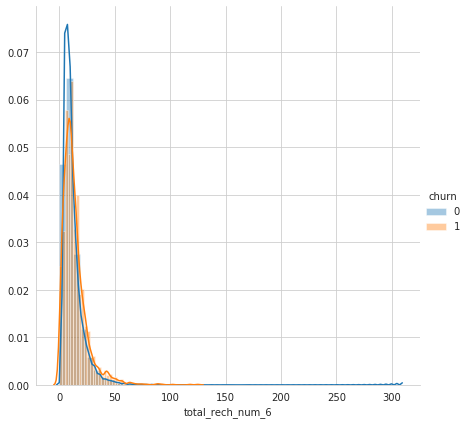

In [136]:
#feature importance of total_rech_num_6
#now use histogram or probability density function for univiraite analysis
#one variable analysis
#this is important to know feature importance in classification
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"total_rech_num_6").add_legend()

#its difficult to know about the churning rate based on total_rech_num_6 feature as overlaped data.

In [137]:
#### Correlation Matrix: Bivariate Analysis

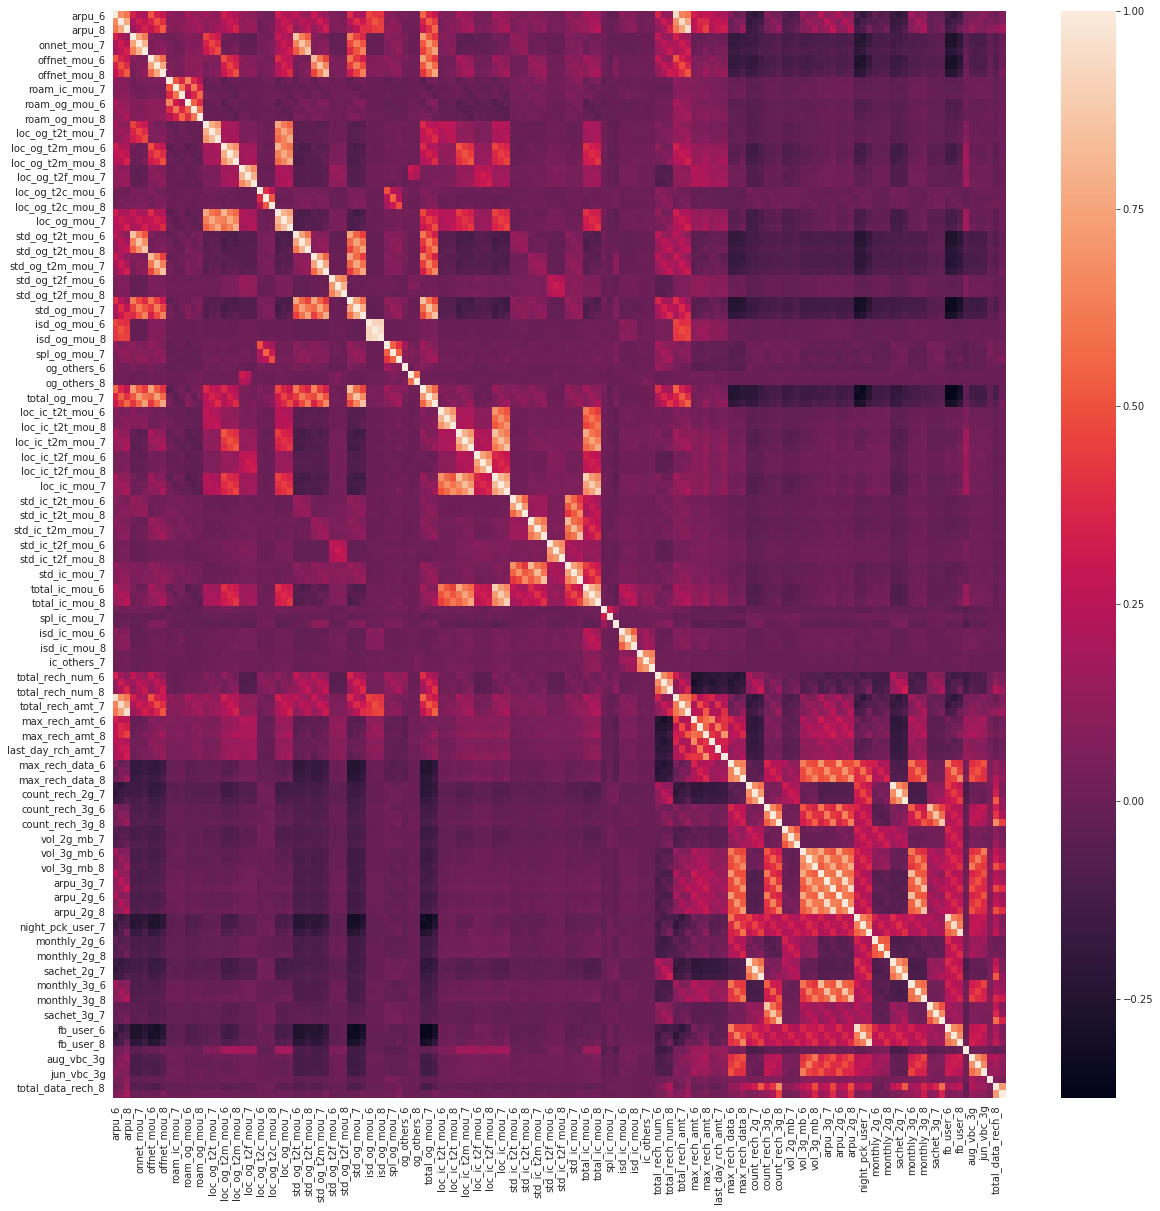

In [139]:
telecom2 = telecom.drop(['churn'], axis=1)

# Let's see the correlation matrix 
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(telecom2.corr())

In [140]:
# Create correlation matrix
corr_matrix = telecom2.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.80
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.80)]

print("HIGHLY CORRELATED FEATURES IN DATA SET:{}\n\n{}".format(len(high_corr_features), high_corr_features))

HIGHLY CORRELATED FEATURES IN DATA SET:48

['onnet_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_7', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'isd_og_mou_7', 'isd_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']


. OBSERVATION: 48 highly correlated features (> 80%) found in the data set.
. NOTE: We are not dropping these columns manually rather using feature reduction methods to do the job. 
    We worked with RFE, LASSO and PCA.

############ 

OBSERVATIONS

Data is higly imbalanced only ~8.14% data is churn & remaining is non_churn
clear relationship found.
There are many highly correlated features, found 48 features with more then 0.8 correlation.

In [143]:
# write treated telecom file
telecom.to_csv("telecom_churn_data_clean.csv", sep=',', index=False)

In [144]:
# Load clean telecom data file
master_df = pd.read_csv('telecom_churn_data_clean.csv', low_memory=False)
master_df.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   197.385   214.816   213.803         0.00         0.00         0.00   
1  1069.180  1349.850  3171.480        57.84        54.68        52.29   
2   378.721   492.223   137.362       413.69       351.03        35.08   
3   514.453   597.753   637.760       102.41       132.11        85.14   
4    74.350   193.897   366.966        48.96        50.66        33.58   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0          0.00          0.00          0.00           0.00           0.00   
1        453.43        567.16        325.91          16.23          33.49   
2         94.66         80.63        136.48           0.00           0.00   
3        757.93        896.68        983.39           0.00           0.00   
4         85.41         89.36        205.89           0.00           0.00   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00           0.00           0.00   
1          31.64          23.74          12.59          38.06   
2           0.00           0.00           0.00           0.00   
3           0.00           0.00           0.00           0.00   
4           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              0.00              0.00              0.00              0.00   
1             51.39             31.38             40.28            308.63   
2            297.13            217.59             12.49             80.96   
3              4.48              6.16             23.34             91.81   
4             48.96             50.66             33.58             82.94   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0              0.00              0.00              0.00              0.00   
1            447.38            162.28             62.13             55.14   
2             70.58             50.54              0.00              0.00   
3             87.93            104.81              0.75              0.00   
4             83.01            148.56              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0               0.0              0.00   
1             53.23               0.0               0.0              0.00   
2              0.00               0.0               0.0              7.15   
3              1.58               0.0               0.0              0.00   
4              0.00               0.0               0.0             17.71   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          0.00          0.00          0.00              0.00   
1        422.16        533.91        255.79              4.30   
2        378.09        288.18         63.04            116.56   
3         97.04         94.09        129.74             97.93   
4        131.91        133.68        182.14              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              0.00              0.00              0.00              0.00   
1             23.29             12.01             49.89             31.76   
2            133.43             22.58             13.69             10.04   
3            125.94             61.79            665.36            808.74   
4              0.00              0.00              2.36              6.35   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1             49.14              6.66             20.08             16.68   
2             75.69              0.00              0.00              0.00   
3            876.99              0.00              0.00              0.00   
4             39.61              0.00              0.00              0.00   



In [145]:
print('Dataframe Shape: ', master_df.shape); print_ln()
print("Dataframe Info: \n"); master_df.info(); print_ln()


Dataframe Shape:  (30001, 149)
-------------------------------------------------------------------------------- 

Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Columns: 149 entries, arpu_6 to churn
dtypes: float64(123), int64(26)
memory usage: 34.1 MB
-------------------------------------------------------------------------------- 



In [146]:
# Create X (independent variable) & y (dependent variable) 
df_telecom = telecom.drop(['churn'], axis=1)
X = telecom.drop(['churn'], axis=1)
y = telecom['churn']

In [147]:
X.shape

(30001, 148)

#### Data Standardization/Normalization

In [148]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)


##### Split Data into Train & Test

In [149]:
# Split in train & Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)


In [150]:
print("X_train Dataframe Shape {}".format(X_train.shape))
print("X_test Dataframe Shape {}".format(X_test.shape))

y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imb = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train Data: {}".format(y_train_imb))
print("Imbalance in Test Data: {}".format(y_test_imb))

X_train Dataframe Shape (21000, 148)
X_test Dataframe Shape (9001, 148)
Imbalance in Train Data: 0.08875985068436333
Imbalance in Test Data: 0.08812862669245648


#### Balance data set by oversampling

In [153]:
# (Training) Balance Data-Set --- SMOT
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_tr,y_tr = sm.fit_sample(X_train,y_train)

In [155]:
print("X_tr Dataframe Shape {}".format(X_tr.shape))
print("y_tr Dataframe Shape {}".format(y_tr.shape))

data_imbalance = (y_tr != 0).sum()/(y_tr == 0).sum()
print("Imbalance in Train Data: {}".format(data_imbalance))

X_tr Dataframe Shape (38576, 148)
y_tr Dataframe Shape (38576,)
Imbalance in Train Data: 1.0


##### Feature reduction using RFE

In [157]:
### Hide warning 
import warnings
warnings.filterwarnings('ignore')

In [158]:
# Feature reduction using RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE

# running RFE with 20 variables as output
rfe = RFE(logreg, 30)   
rfe = rfe.fit(X_tr, y_tr)

In [159]:
#print(rfe.support_)
#print(rfe.ranking_) 

[False  True False False False False False  True False False False False
 False  True False False  True False False  True False False False False
 False False False False  True  True False False False False  True False
 False False False False False False False  True False False False False
 False False  True False False  True False False False False  True  True
 False False False False False  True False  True  True False False False
 False False False False False False False False  True False False  True
 False False False False False False False False  True False False False
 False False False False False  True False False  True False False False
 False False False False False  True False False False False False False
 False False  True False False  True False False False False False False
 False False False False False False  True False  True  True False False
 False  True  True  True]
[ 18   1   4  11  19 100  24   1  72  58  86  99  70   1  73   9   1   8
  25   1  28  48  29 116 

In [163]:
rfe_features = list(df_telecom.columns[rfe.support_])
print("Features identified by RFE for model buidling: ", rfe_features,'\n   Len :',len(rfe_features))

Features identified by RFE for model buidling:  ['arpu_7', 'offnet_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2m_mou_7', 'isd_og_mou_7', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'max_rech_data_8', 'vol_2g_mb_8', 'arpu_2g_8', 'night_pck_user_8', 'fb_user_6', 'fb_user_8', 'aon', 'sep_vbc_3g', 'total_data_rech_8', 'amt_data_8'] 
   Len : 30


In [164]:
X_rfe = pd.DataFrame(data=X_tr).iloc[:, rfe.support_]
y_rfe = y_tr

#####  Logistic Regression Model

In [165]:
#from sklearn.linear_model import LogisticRegression
# 
#classifier = LogisticRegression(random_state=1)
#classifier.fit(X_rfe, y_rfe)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [200]:
# Create a function for the models Logistic, DT and Random Forest
def models(X_train,y_train,randon_state_val):
    
    # Logistic Regrssion
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=randon_state_val)
    log.fit(X_train,y_train)
    
    # Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion='entropy',random_state=randon_state_val)
    tree.fit(X_train,y_train)
    
    # Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=20,criterion='entropy',random_state=randon_state_val)
    forest.fit(X_train,y_train)
    
    #print the model accuracy
    
    print('[0] Logistic regression training Accuracy',log.score(X_train,y_train))
    print('[1] Decision tree training Accuracy',tree.score(X_train,y_train))
    print('[2] Random Forest training Accuracy',forest.score(X_train,y_train))
    
    
    return log,tree,forest

In [201]:
# Getting Model accuracy
logreg,dtree,rforest = models(X_rfe, y_rfe,1)

[0] Logistic regression training Accuracy 0.8420261302364164
[1] Decision tree training Accuracy 1.0
[2] Random Forest training Accuracy 0.9994296972210701


In [202]:
# Test model accuracy on test data on confusion matrix
from sklearn.metrics import confusion_matrix

def confusion_matrix_models(y_test,X_test,logreg,dtree,rforest):
    # Using LMogistic Regression   
    cm = confusion_matrix(y_test,logreg.predict(X_test))
    print('-----------------Logistic Regression--------------------')
    print('Logistic regression training Accuracy',logreg.score(X_test_rfe,y_test))
    print(cm)
    test_accuracy(cm)
    print('---------------------------------------')
    # Using Decision tree
    cm = confusion_matrix(y_test,dtree.predict(X_test))
    print('----------------Decision Tree-------------------')
    print('Decision tree training Accuracy',dtree.score(X_test_rfe,y_test))
    
    print(cm)
    test_accuracy(cm)
    print('---------------------------------------')
    # Using Random Forest 
    cm = confusion_matrix(y_test,rforest.predict(X_test))
    print('----------------Random Forest-------------------')
    print('Random Forest training Accuracy',rforest.score(X_test_rfe,y_test))
    
    print(cm)
    test_accuracy(cm)
    print('---------------------------------------')
    
    
def test_accuracy(cm):
    TP = cm[0][0]
    TN = cm[1][1]
    FN = cm[1][0]
    FP = cm[0][1]
    
    print('Testing Accuracy = ',(TP+TN)/(TP+TN+FP+FN))



In [203]:
confusion_matrix_models(y_test,X_test_rfe,logreg,dtree,rforest)

-----------------Logistic Regression--------------------
Logistic regression training Accuracy 0.8139095656038218
[[6726 1546]
 [ 129  600]]
Testing Accuracy =  0.8139095656038218
---------------------------------------
----------------Decision Tree-------------------
Decision tree training Accuracy 0.8704588379068993
[[7430  842]
 [ 324  405]]
Testing Accuracy =  0.8704588379068993
---------------------------------------
----------------Random Forest-------------------
Random Forest training Accuracy 0.9192311965337184
[[7808  464]
 [ 263  466]]
Testing Accuracy =  0.9192311965337184
---------------------------------------


OBSERVATIONS

1. Getting 81.0% accuracy
2. Confusion matix clearly shows that the model has drawback in predicting churn as high false positives.
3. Features identified by RFE for model buidling:  'arpu_7', 'offnet_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2m_mou_7', 'isd_og_mou_7', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'max_rech_data_8', 'vol_2g_mb_8', 'arpu_2g_8', 'night_pck_user_8', 'fb_user_6', 'fb_user_8', 'aon', 'sep_vbc_3g', 'total_data_rech_8', 'amt_data_8'

##### whether a high-value customer will churn or not

###### 1 . Calculate difference between 8th and previous months

In [114]:
def trim_features(feature_name):
    feature_name = feature_name.strip()
    return feature_name[0:len(feature_name)-2]

def find_diff_bt_features(features_8):
    extra_column_created = []
    for col_name in features_8:
        col_name = trim_features(col_name)
        dataset[col_name+'_diff'] = dataset[col_name+'_8'] - ( ( dataset[col_name+'_6'] +  dataset[col_name+'_7'] )/2)
        extra_column_created.append(col_name+'_diff')
    return extra_column_created

In [435]:
# arpu_diff
#dataset['arpu_diff'] = dataset.arpu_8 - ((dataset.arpu_6 + dataset.arpu_7)/2)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [115]:
dataset[extra_column_created].head(10)

NameError: name 'extra_column_created' is not defined

In [472]:
dataset[extra_column_created].describe()

arpu_diff  onnet_mou_diff  offnet_mou_diff  roam_ic_mou_diff  \
count  30001.000000    30001.000000     30001.000000      30001.000000   
mean     -51.038557      -30.193620       -40.821520         -1.875878   
std      334.872321      308.732579       349.434892         65.972062   
min    -5811.052500    -5295.315000     -7094.390000      -1296.985000   
25%     -180.179500      -52.345000      -100.900000          0.000000   
50%      -40.754500       -3.210000       -11.025000          0.000000   
75%       83.239000       18.410000        41.040000          0.000000   
max    12808.617000     6359.920000     12604.240000       2330.200000   

       roam_og_mou_diff  loc_og_t2t_mou_diff  loc_og_t2m_mou_diff  \
count      30001.000000         30001.000000         30001.000000   
mean          -3.496201            -7.002408           -11.369818   
std           94.165541           138.240028           148.307664   
min        -2410.835000         -3875.375000         -2863.535000   
25%            0.000000           -16.615000           -38.820000   
50%            0.000000            -1.030000            -3.090000   
75%            0.000000             8.245000            21.405000   
max         3057.150000          6412.690000          3158.700000   

       loc_og_t2f_mou_diff  loc_og_t2c_mou_diff  loc_og_mou_diff  \
count         30001.000000         30001.000000     30001.000000   
mean             -0.497514            -0.024744       -18.870166   
std              14.046863             6.974352       213.766985   
min           -1319.850000          -384.385000     -3867.830000   
25%              -1.210000            -0.365000       -58.880000   
50%               0.000000             0.000000        -4.955000   
75%               0.230000             0.000000        30.125000   
max             452.720000           193.355000      4619.975000   

       std_og_t2t_mou_diff  std_og_t2m_mou_diff  std_og_t2f_mou_diff  \
count         30001.000000         30001.000000         30001.000000   
mean            -21.618459           -26.327010            -0.230066   
std             273.056056           303.760044             7.536745   
min           -5391.210000         -7037.535000          -314.280000   
25%             -12.160000           -25.980000             0.000000   
50%               0.000000            -0.030000             0.000000   
75%               0.495000             4.160000             0.000000   
max            4806.465000         12685.460000           209.935000   

       std_og_t2c_mou_diff  std_og_mou_diff  isd_og_mou_diff  spl_og_mou_diff  \
count              30001.0     30001.000000     30001.000000     30001.000000   
mean                   0.0       -48.175917        -0.189665         0.093746   
std                    0.0       427.952693        14.001271        18.088160   
min                    0.0     -7127.425000      -619.650000     -1081.910000   
25%                    0.0       -54.595000         0.000000        -2.750000   
50%                    0.0        -0.405000         0.000000         0.000000   
75%                    0.0         8.105000         0.000000         1.310000   
max                    0.0     12715.480000       544.780000       747.620000   

       og_others_diff  total_og_mou_diff  loc_ic_t2t_mou_diff  \
count    30001.000000       30001.000000         30001.000000   
mean        -0.294391         -67.437337            -3.425675   
std          3.318381         502.630069           102.050822   
min       -304.905000       -7213.410000         -3021.870000   
25%          0.000000        -168.025000           -15.170000   
50%          0.000000         -14.625000            -1.045000   
75%          0.000000          67.915000             9.205000   
max        366.590000       12768.705000          3743.340000   

       loc_ic_t2m_mou_diff  loc_ic_t2f_mou_diff  loc_ic_mou_diff  \
count         30001.000000         30001.000000     30001.000000   
mean   

#### Delete columns that belong to the churn month (9th month)

In [473]:
dataset.shape

(30001, 264)

In [476]:
column_name_9 = [col_name for col_name in dataset.columns if '_9' in col_name]
print(column_name_9)
print(len(column_name_9))

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9']
51


In [107]:
churn_filtered = churn_filtered.filter(regex='[^9]$', axis=1)
churn_filtered.shape

(30001, 158)

In [109]:
# extract all names that end with 9
col_9_names = churn_filtered.filter(regex='9$', axis=1).columns
col_9_names

Index([], dtype='object')

In [110]:
# update num_cols and cat_cols column name list
cat_cols = [col for col in cat_cols if col not in col_9_names]
cat_cols.append('churn')
num_cols = [col for col in churn_filtered.columns if col not in cat_cols]

NameError: name 'cat_cols' is not defined

In [480]:
# Drop feacture name having 9 from dataset
original = dataset.copy()
print('Before Droping ----- ',dataset.shape)
dataset.drop(columns=column_name_9,inplace=True)
print('After Droping ----- ',dataset.shape)

Before Droping -----  (30001, 264)
After Droping -----  (30001, 213)


In [3]:
# Saving dataset after droping _9 features
dataset.to_csv('dataset_after_9.csv',index=False)

NameError: name 'dataset' is not defined

In [ ]:
# End of file --- Next

In [115]:
#Import saved data
dataset = pd.read_csv('dataset_after_9.csv')
dataset.head(10)

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
0             0.0             0.0             0.0   197.385   214.816   
1             0.0             0.0             0.0  1069.180  1349.850   
2             0.0             0.0             0.0   378.721   492.223   
3             0.0             0.0             0.0   514.453   597.753   
4             0.0             0.0             0.0    74.350   193.897   
5             0.0             0.0             0.0   977.020  2362.833   
6             0.0             0.0             0.0   363.987   486.558   
7             0.0             0.0             0.0   482.832   425.764   
8             0.0             0.0             0.0  1873.271   575.927   
9             0.0             0.0             0.0   978.077  1141.296   

     arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   213.803         0.00         0.00         0.00          0.00   
1  3171.480        57.84        54.68        52.29        453.43   
2   137.362       413.69       351.03        35.08         94.66   
3   637.760       102.41       132.11        85.14        757.93   
4   366.966        48.96        50.66        33.58         85.41   
5   409.230         0.00         0.00         0.00          0.00   
6   393.909       248.99       619.96       666.38         88.86   
7   229.769        86.39       118.88        80.44        232.36   
8   179.218      2061.69       881.43       156.91       1087.76   
9   706.020       135.14       119.59       102.69        479.31   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00          0.00           0.00           0.00           0.00   
1        567.16        325.91          16.23          33.49          31.64   
2         80.63        136.48           0.00           0.00           0.00   
3        896.68        983.39           0.00           0.00           0.00   
4         89.36        205.89           0.00           0.00           0.00   
5          0.00          0.00           0.00           0.00           0.00   
6         50.58         97.81           0.00           0.00           0.00   
7        280.78        136.69           0.00           0.00           0.00   
8        258.29         68.18           0.00           0.00           0.00   
9        543.18        261.34           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00              0.00   
1          23.74          12.59          38.06             51.39   
2           0.00           0.00           0.00            297.13   
3           0.00           0.00           0.00              4.48   
4           0.00           0.00           0.00             48.96   
5           0.00           0.00           0.00              0.00   
6           0.00           0.00           0.00             29.88   
7           0.00           0.00           0.00             86.39   
8           0.00           0.00           0.00            611.18   
9           0.00           0.00           0.00            118.44   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.00              0.00              0.00   
1             31.38             40.28            308.63            447.38   
2            217.59             12.49             80.96             70.58   
3              6.16             23.34             91.81             87.93   
4             50.66             33.58             82.94             83.01   
5              0.00              0.00              0.00              0.00   
6             17.33              9.48             33.76             16.19   
7            118.88             80.44            142.69            174.91   
8            154.56             29.31           1012.04            188.83   
9            103.68            102.69            238.58            196.5

### Modelling

#### i) Making predictions


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from imblearn.metrics import sensitivity_specificity_support

In [7]:
#Preprocessing data

In [116]:
# change churn to numeric
dataset['churn'] = pd.to_numeric(dataset['churn'])

##### Train Test split

In [117]:
# divide data into train and test
X = dataset.drop("churn", axis = 1)
y = dataset.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [118]:
# print shapes of train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(22500, 212)
(22500,)
(7501, 212)
(7501,)


#### Aggregating the categorical columns

In [111]:
cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',             
             'fb_user_6',
             'fb_user_7',
             'fb_user_8'
            ]


In [119]:
train = pd.concat([X_train, y_train], axis=1)
train.head(10)


loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
4525              0.0             0.0             0.0   222.318     0.600   
12436             0.0             0.0             0.0    95.730    91.080   
29024             0.0             0.0             0.0   624.408   422.789   
11193             0.0             0.0             0.0   433.962   541.500   
10907             0.0             0.0             0.0   405.656   588.606   
11486             0.0             0.0             0.0   683.819   697.761   
4626              0.0             0.0             0.0   282.650   175.780   
6118              0.0             0.0             0.0  1432.429  1001.870   
16514             0.0             0.0             0.0   646.984   282.943   
1556              0.0             0.0             0.0   401.057   448.043   

         arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
4525    183.004         3.93         0.00         0.00          4.09   
12436    62.260         5.44        11.20         0.00         39.46   
29024    24.750       725.11       671.44        11.76        145.63   
11193   422.360        17.93        37.53        23.89        526.68   
10907  2300.151         7.53        11.88        56.49        788.53   
11486   816.139       446.54       356.58       397.16        465.78   
4626    351.780        81.43        10.36         4.94        371.24   
6118   1873.663       727.29       756.69      1411.19        149.54   
16514   240.106       100.74        28.69        26.81        135.51   
1556    399.159       341.63       191.49       273.06        391.31   

       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
4525           0.16         15.46           0.00           0.00   
12436         11.64         37.74           0.00          39.19   
29024         80.66          2.50           0.00           4.98   
11193        831.58        671.01           0.00           0.00   
10907       1441.28       5453.33          19.33           3.85   
11486        523.69        657.78           0.00           0.00   
4626         212.73        350.68           0.00           0.00   
6118         132.14        124.83           0.00           0.00   
16514         48.86         32.14          92.24          49.36   
1556         681.63        738.43           0.00           0.00   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
4525            0.00           0.00           0.00           0.00   
12436           0.00           0.00           1.71           0.00   
29024           4.69           0.00          22.89          14.26   
11193           0.00           0.00           0.00           0.00   
10907           0.00          72.91          33.06           0.00   
11486           0.00           0.00           0.00           0.00   
4626            0.00           0.00           0.00           0.00   
6118            0.00           0.00           0.00           0.00   
16514          87.43         233.79          77.56          58.96   
1556            0.00           0.00           0.00           0.00   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
4525               0.36              0.00              0.00              0.96   
12436              4.88             11.20              0.00             17.68   
29024             76.13             37.13              0.00             69.89   
11193              0.68              0.00              0.00              7.38   
10907              0.08             11.88             55.51             29.24   
11486            430.99            341.84            372.01            376.33   
4626              81.43             10.36              4.94            363.49   
6118             130.46             58.56            123.91            125.04   
16514              1.44              0.00              0.00              1.01   
1556              46.54              3.04             16.0

In [120]:
def cat_var_grp(cat_columns):
    for column_name in cat_columns:
        print('--------',column_name,'-------------')
        print(train.groupby(column_name).churn.mean())
        print('--------------------------------------\n')
    


In [121]:
cat_var_grp(cat_cols)

-------- night_pck_user_6 -------------
night_pck_user_6
-1.0    0.099165
 0.0    0.066797
 1.0    0.087838
Name: churn, dtype: float64
--------------------------------------

-------- night_pck_user_7 -------------
night_pck_user_7
-1.0    0.115746
 0.0    0.055494
 1.0    0.051282
Name: churn, dtype: float64
--------------------------------------

-------- night_pck_user_8 -------------
night_pck_user_8
-1.0    0.141108
 0.0    0.029023
 1.0    0.016194
Name: churn, dtype: float64
--------------------------------------

-------- fb_user_6 -------------
fb_user_6
-1.0    0.099165
 0.0    0.069460
 1.0    0.067124
Name: churn, dtype: float64
--------------------------------------

-------- fb_user_7 -------------
fb_user_7
-1.0    0.115746
 0.0    0.059305
 1.0    0.055082
Name: churn, dtype: float64
--------------------------------------

-------- fb_user_8 -------------
fb_user_8
-1.0    0.141108
 0.0    0.066887
 1.0    0.024463
Name: churn, dtype: float64
--------------------------

In [80]:
X_train['fb_user_8'].head(20)

4525     1.0
12436    1.0
29024   -1.0
11193   -1.0
10907    1.0
11486   -1.0
4626     1.0
6118     1.0
16514   -1.0
1556     0.0
8730     1.0
588      1.0
11879    1.0
6320    -1.0
23189    0.0
29745   -1.0
22850    1.0
5073     1.0
26061    1.0
4718     1.0
Name: fb_user_8, dtype: float64

In [122]:
# replace categories with aggregated values in each categorical column
mapping = {'night_pck_user_6' : {-1: 0.099165, 0: 0.066797, 1: 0.087838},
           'night_pck_user_7' : {-1: 0.115746, 0: 0.055494, 1: 0.051282},
           'night_pck_user_8' : {-1: 0.141108, 0: 0.029023, 1: 0.016194},
           'fb_user_6'        : {-1: 0.099165, 0: 0.069460, 1: 0.067124},
           'fb_user_7'        : {-1: 0.115746, 0: 0.059305, 1: 0.055082},
           'fb_user_8'        : {-1: 0.141108, 0: 0.066887, 1: 0.024463}
          }
X_train.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)

/home/sharma/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


In [82]:
X_train['fb_user_8'].head(20)

4525     0.024463
12436    0.024463
29024    0.141108
11193    0.141108
10907    0.024463
11486    0.141108
4626     0.024463
6118     0.024463
16514    0.141108
1556     0.066887
8730     0.024463
588      0.024463
11879    0.024463
6320     0.141108
23189    0.066887
29745    0.141108
22850    0.024463
5073     0.024463
26061    0.024463
4718     0.024463
Name: fb_user_8, dtype: float64

In [16]:
cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',             
             'fb_user_6',
             'fb_user_7',
             'fb_user_8'             
            ]

In [83]:
# check data type of categorical columns - make sure they are numeric
X_train[[col for col in cat_cols if col not in ['churn']]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22500 entries, 4525 to 22754
Data columns (total 6 columns):
night_pck_user_6    22500 non-null float64
night_pck_user_7    22500 non-null float64
night_pck_user_8    22500 non-null float64
fb_user_6           22500 non-null float64
fb_user_7           22500 non-null float64
fb_user_8           22500 non-null float64
dtypes: float64(6)
memory usage: 1.2 MB


##### PCA

In [123]:
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [124]:
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [125]:
churn_pca.shape

(22500, 212)

In [126]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0        9.16
1       16.36
2       21.46
3       26.34
4       30.16
5       33.63
6       36.59
7       39.10
8       41.30
9       43.37
10      45.36
11      47.25
12      49.05
13      50.74
14      52.32
15      53.84
16      55.29
17      56.74
18      58.12
19      59.46
20      60.77
21      62.03
22      63.25
23      64.43
24      65.58
25      66.69
26      67.77
27      68.81
28      69.82
29      70.81
        ...  
182    100.00
183    100.00
184    100.00
185    100.00
186    100.00
187    100.00
188    100.00
189    100.00
190    100.00
191    100.00
192    100.00
193    100.00
194    100.00
195    100.00
196    100.00
197    100.00
198    100.00
199    100.00
200    100.00
201    100.00
202    100.00
203    100.00
204    100.00
205    100.00
206    100.00
207    100.00
208    100.00
209    100.00
210    100.00
211    100.00
Length: 212, dtype: float64


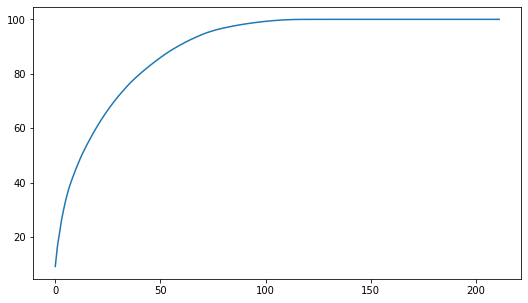

In [127]:
 # plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis;  elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

#### PCA and Logistic Regression

In [128]:
def define_pca_vars():
    PCA_VARS = [40,50,60,70,75,80,85,90,95]
    pca_var_score = {}
    for pca_var in PCA_VARS:
        steps = [('scaler', StandardScaler()),
                 ("pca", PCA(n_components=pca_var)),
                 ("logistic", LogisticRegression(class_weight='balanced'))
                ]
        pipeline = Pipeline(steps)
        # fit model
        pipeline.fit(X_train, y_train)
        
        # check score on train data   
        score = pipeline.score(X_train, y_train)
        pca_var_score.__setitem__(pca_var,score)
    return pca_var_score
        
        
        

In [129]:
pca_var_score = define_pca_vars()
pca_var_score

/home/sharma/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/sharma/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

{40: 0.8118666666666666,
 50: 0.8116,
 60: 0.8139111111111111,
 70: 0.8149777777777778,
 75: 0.8149333333333333,
 80: 0.8154222222222223,
 85: 0.8167555555555556,
 90: 0.8173777777777778,
 95: 0.8168}

In [130]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))


[[5565 1326]
 [ 102  508]]
Sensitivity: 	0.83
Specificity: 	0.81
AUC:    	 0.9


In [131]:
# class imbalance
y_train.value_counts()/y_train.shape

0    0.918622
1    0.081378
Name: churn, dtype: float64

chrun 92% and not chrun 8%

In [108]:
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit
SEED = 43
SPLIT = 3

X_train = [0,1,2,3,4,5,6,7,8]
y_train = [0,0,0,0,0,0,1,1,1]   # note 6,7,8 are labelled class '1'

print("KFold, shuffle=False (default)")
kf = KFold(n_splits=SPLIT, random_state=SEED)
for train_index, test_index in kf.split(X_train, y_train):
    print("TRAIN:", train_index, "TEST:", test_index)

print("KFold, shuffle=True")
kf = KFold(n_splits=SPLIT, shuffle=True, random_state=SEED)
for train_index, test_index in kf.split(X_train, y_train):
    print("TRAIN:", train_index, "TEST:", test_index)

print("\nStratifiedKFold, shuffle=False (default)")
skf = StratifiedKFold(n_splits=SPLIT, random_state=SEED)
for train_index, test_index in skf.split(X_train, y_train):
    print("TRAIN:", train_index, "TEST:", test_index)

print("StratifiedKFold, shuffle=True")
skf = StratifiedKFold(n_splits=SPLIT, shuffle=True, random_state=SEED)
for train_index, test_index in skf.split(X_train, y_train):
    print("TRAIN:", train_index, "TEST:", test_index)

print("\nStratifiedShuffleSplit")
sss = StratifiedShuffleSplit(n_splits=SPLIT, random_state=SEED, test_size=3)
for train_index, test_index in sss.split(X_train, y_train):
    print("TRAIN:", train_index, "TEST:", test_index)

print("\nStratifiedShuffleSplit (can customise test_size)")
sss = StratifiedShuffleSplit(n_splits=SPLIT, random_state=SEED, test_size=2)
for train_index, test_index in sss.split(X_train, y_train):
    print("TRAIN:", train_index, "TEST:", test_index)

KFold, shuffle=False (default)
TRAIN: [3 4 5 6 7 8] TEST: [0 1 2]
TRAIN: [0 1 2 6 7 8] TEST: [3 4 5]
TRAIN: [0 1 2 3 4 5] TEST: [6 7 8]
KFold, shuffle=True
TRAIN: [0 1 2 4 5 7] TEST: [3 6 8]
TRAIN: [0 1 3 4 6 8] TEST: [2 5 7]
TRAIN: [2 3 5 6 7 8] TEST: [0 1 4]

StratifiedKFold, shuffle=False (default)
TRAIN: [2 3 4 5 7 8] TEST: [0 1 6]
TRAIN: [0 1 4 5 6 8] TEST: [2 3 7]
TRAIN: [0 1 2 3 6 7] TEST: [4 5 8]
StratifiedKFold, shuffle=True
TRAIN: [0 1 3 5 6 8] TEST: [2 4 7]
TRAIN: [0 2 4 5 7 8] TEST: [1 3 6]
TRAIN: [1 2 3 4 6 7] TEST: [0 5 8]

StratifiedShuffleSplit
TRAIN: [7 5 1 6 2 3] TEST: [0 4 8]
TRAIN: [6 5 1 8 4 2] TEST: [0 7 3]
TRAIN: [0 8 3 1 2 7] TEST: [5 6 4]

StratifiedShuffleSplit (can customise test_size)
TRAIN: [7 5 1 0 6 2 3] TEST: [8 4]
TRAIN: [3 5 1 6 8 4 2] TEST: [7 0]
TRAIN: [8 5 7 3 1 2 4] TEST: [6 0]


/home/sharma/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [132]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 
          'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [133]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/sharma/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   57.9s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  1.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           c...
                          

In [134]:
# cross validation results
pd.DataFrame(model.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        6.714506      2.220822         0.000000        0.000000   
1        2.887243      1.028420         0.000000        0.000000   
2        1.727956      0.193022         0.063465        0.039008   
3        2.188464      0.134668         0.046730        0.008092   
4        1.333557      0.095465         0.000000        0.000000   
5        1.744740      0.134695         0.000000        0.000000   
6        1.682865      0.152293         0.038339        0.009512   
7        2.217342      0.118668         0.045527        0.008812   
8        1.294722      0.103468         0.000000        0.000000   
9        1.860762      0.117638         0.000000        0.000000   
10       1.671773      0.131547         0.062684        0.045425   
11       2.288426      0.126624         0.055930        0.009105   
12       1.342155      0.053835         0.000000        0.000000   
13       2.037866      0.157238         0.000000        0.000000   
14       1.811046      0.241045         0.043688        0.006333   
15       2.187483      0.102969         0.051367        0.013005   
16       1.284265      0.101963         0.000000        0.000000   
17       1.713338      0.150983         0.000000        0.000000   
18       1.715512      0.069710         0.038970        0.007836   
19       2.063791      0.132608         0.048786        0.011253   
20       1.148492      0.037458         0.000000        0.000000   
21       1.522826      0.031685         0.000000        0.000000   
22       1.601235      0.073762         0.035239        0.007024   
23       2.072838      0.077792         0.045209        0.004237   
24       1.165385      0.084107         0.000000        0.000000   
25       1.501222      0.034243         0.000000        0.000000   
26       1.536642      0.092467         0.041253        0.005290   
27       2.068906      0.032165         0.042760        0.006305   
28       1.181814      0.042167         0.000000        0.000000   
29       1.506288      0.034634         0.000000        0.000000   
30       1.547411      0.085807         0.033608        0.003908   
31       1.829828      0.346618         0.028377        0.009710   

   param_logistic__C param_logistic__penalty param_pca__n_components  \
0                0.1                      l1                      60   
1                0.1                      l1                      80   
2                0.1                      l2                      60   
3                0.1                      l2                      80   
4                0.5                      l1                      60   
5                0.5                      l1                      80   
6                0.5                      l2                      60   
7                0.5                      l2                      80   
8                  1                      l1                      60   
9                  1                      l1                      80   
10                 1                      l2                      60   
11                 1                      l2                      80   
12                 2                      l1                      60   
13                 2                      l1                      80   
14                 2                      l2                      60   
15                 2                      l2                      80   
16                 3                      l1                      60   
17                 3                      l1                      80   
18                 3                      l2                      60   
19                 3                      l2                      80   
20                 4                      l1                      60   
21                 4                      l1                      80   
22                 4                      l2                      60   
23                 4           

In [135]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8886951271440593
Best hyperparameters:  {'logistic__C': 0.5, 'logistic__penalty': 'l2', 'pca__n_components': 80}


In [136]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5830 1061]
 [ 109  501]]
Sensitivity: 	0.82
Specificity: 	0.85
AUC:    	 0.9


In [31]:
# old (Before hyperparameter)

#[[5568 1323]
# [ 103  507]]

# Sensitivity: 	0.83
# Specificity: 	0.81
# AUC:    	 0.9

##### Random Forest

In [137]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [138]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  5.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 0.1, 1: 0.9},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                   

In [139]:

# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9281034782217773
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [140]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6778  113]
 [ 302  308]]
Sensitivity: 	0.5
Specificity: 	0.98
AUC:    	 0.93


Poor sensitivity. The best model is PCA along with Logistic regression.

##### ii) Choosing best features

In [141]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, 
                                  max_features=max_features, 
                                  class_weight={0:0.1, 1: 0.9}, 
                                  oob_score=True, 
                                  random_state=4, verbose=1)

15


In [142]:
# fit model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   17.8s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.1, 1: 0.9}, criterion='gini',
                       max_depth=None, max_features=15, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=True,
                       random_state=4, verbose=1, warm_start=False)

In [145]:
# OOB score
rf_model.oob_score_

0.944

In [144]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[6785  106]
 [ 326  284]]
Sensitivity: 	0.47
Specificity: 	0.98
ROC:    	 0.93


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


#### Feature Importance

In [149]:
# predictors
features = dataset.drop('churn', axis=1).columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.0


variables  importance_percentage
0           total_ic_mou_8               5.460938
1             loc_ic_mou_8               3.457478
2         loc_ic_t2t_mou_8               3.406873
3         loc_og_t2m_mou_8               3.022305
4                   arpu_8               2.459040
5         loc_ic_t2m_mou_8               2.434481
6      total_rech_amt_diff               2.315010
7                arpu_diff               1.942810
8         loc_og_t2t_mou_8               1.860446
9       last_day_rch_amt_8               1.850944
10          total_og_mou_8               1.841462
11            loc_og_mou_8               1.827590
12        total_rech_amt_8               1.812722
13          max_rech_amt_8               1.570427
14         loc_ic_mou_diff               1.549903
15       total_og_mou_diff               1.442586
16            std_ic_mou_8               1.402462
17           roam_og_mou_8               1.371091
18             onnet_mou_8               1.362095
19        loc_ic_t2f_mou_8               1.309457
20       total_ic_mou_diff               1.303744
21        roam_og_mou_diff               1.302745
22     total_rech_num_diff               1.225341
23      av_rech_amt_data_8               1.200688
24         std_og_mou_diff               1.190969
25           roam_ic_mou_8               1.176044
26        std_ic_t2m_mou_8               1.152643
27   last_day_rch_amt_diff               1.126359
28         max_rech_data_8               1.038161
29        roam_ic_mou_diff               0.978064
..                     ...                    ...
182       std_og_t2f_mou_6               0.059094
183        count_rech_3g_8               0.058767
184              fb_user_7               0.052141
185        count_rech_3g_6               0.047736
186            sachet_3g_6               0.047514
187            sachet_3g_7               0.045302
188           monthly_3g_7               0.042796
189       night_pck_user_7               0.041443
190       std_og_t2f_mou_8               0.039809
191              fb_user_6               0.038436
192           monthly_2g_7               0.034964
193            sachet_3g_8               0.034575
194           monthly_3g_6               0.033052
195           monthly_2g_6               0.032201
196           monthly_2g_8               0.030631
197       night_pck_user_6               0.027637
198           monthly_3g_8               0.026989
199            og_others_7               0.023216
200            og_others_8               0.006975
201         loc_ic_t2o_mou               0.000000
202       std_ic_t2o_mou_6               0.000000
203    std_og_t2c_mou_diff               0.000000
204       std_og_t2c_mou_6               0.000000
205       std_og_t2c_mou_7               0.000000
206       std_og_t2c_mou_8               0.000000
207    std_ic_t2o_mou_diff               0.000000
208         std_og_t2o_mou               0.000000
209       std_ic_t2o_mou_8               0.000000
210       std_ic_t2o_mou_7               0.000000
211         loc_og_t2o_mou               0.000000

[212 rows x 2 columns]

#### Extracting top 30 features

In [45]:
# extract top 'n' features
top_n = 30
top_features = feature_importance.variables[0:top_n]

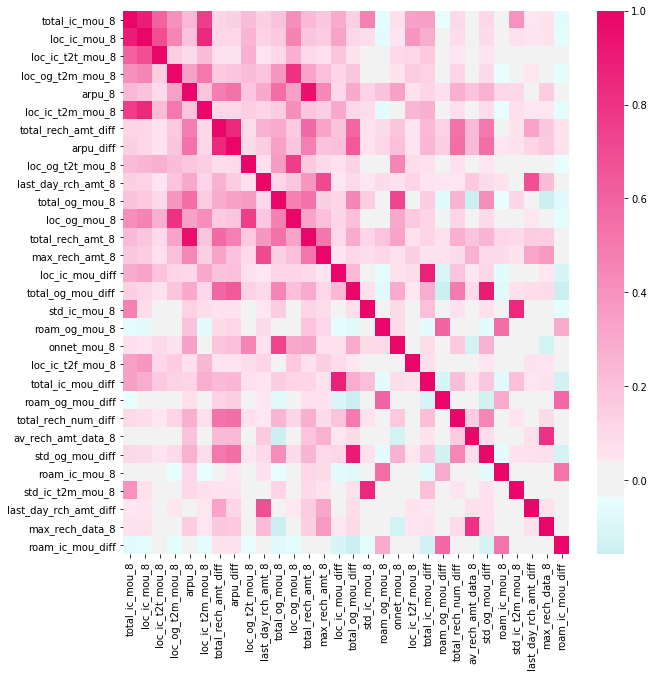

In [46]:
# plot feature correlation
import seaborn as sns
plt.rcParams["figure.figsize"] =(10,10)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=X_train[top_features].corr(), center=0.0, cmap=mycmap)

In [47]:
top_features = ['total_ic_mou_8', 'total_rech_amt_diff', 'total_og_mou_8', 'arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 
                'std_ic_mou_8', 'av_rech_amt_data_8', 'std_og_mou_8']
X_train = X_train[top_features]
X_test = X_test[top_features]

In [48]:
X_train.head()

total_ic_mou_8  total_rech_amt_diff  total_og_mou_8    arpu_8  \
4525            39.89                 85.0           15.46   183.004   
12436          276.14                -98.0           37.74    62.260   
29024            0.00               -697.0            0.00    24.750   
11193           94.99                -77.0          694.91   422.360   
10907          339.49               2215.0         5517.63  2300.151   

       roam_ic_mou_8  roam_og_mou_8  std_ic_mou_8  av_rech_amt_data_8  \
4525            0.00           0.00         30.41               215.0   
12436           0.00           0.00        180.61               504.0   
29024           4.69          14.26          0.00                 0.0   
11193           0.00           0.00         37.71                 0.0   
10907           0.00           0.00         24.94                17.0   

       std_og_mou_8  
4525           0.00  
12436         12.51  
29024          0.00  
11193        665.63  
10907       5202.08